In [1]:
import os
import sys
import pandas as pd

sys.path.append('/home/fboehning/fboehning')

import logging
logging.basicConfig(
    level=logging.INFO,
    #level=logging.DEBUG,
    format='%(asctime)s - %(filename)s - %(name)s - %(funcName)s - %(levelname)s - %(message)s')

In [2]:
TOOLKIT=[
    'beesup_llm.toolkit.llm_utils',
    'beesup_llm.toolkit.dict_utils',
    'beesup_llm.toolkit.setup_utils',
    'beesup_llm.toolkit.visualization',
    'beesup_llm.toolkit.display_settings',
]

DATASET=[
    'beesup_llm.dataset',
]

MODEL_PIPELINES=[
    'beesup_llm.model_pipelines'
]

INJECTION=[
    'beesup_llm.injection',
    'beesup_llm.injection.taxomizing_pipeline',
    'beesup_llm.injection.taxomizing_utils',
]

# EXTRACTION=[
#     'beesup_llm.extraction',
#     'beesup_llm.extraction.extraction_pipeline',
#     'beesup_llm.extraction.extraction_utils',
#     'beesup_llm.extraction.evaluation_pipeline',
#     'beesup_llm.extraction.evaluation_utils',
# ]

# EXPERIMENT=[
#     'beesup_llm.experiment',
#     'beesup_llm.experiment.extraction_experiment'
# ]


import importlib
import beesup_llm;
import beesup_llm.toolkit.llm_utils; from beesup_llm.toolkit.llm_utils import *
import beesup_llm.toolkit.dict_utils; from beesup_llm.toolkit.dict_utils import *
import beesup_llm.toolkit.setup_utils; from beesup_llm.toolkit.setup_utils import *
import beesup_llm.toolkit.visualization; from beesup_llm.toolkit.visualization import *
import beesup_llm.toolkit.display_settings; from beesup_llm.toolkit.display_settings import *

import beesup_llm.dataset; from beesup_llm.dataset import *
import beesup_llm.training; from beesup_llm.training import *
import beesup_llm.model_pipelines; from beesup_llm.model_pipelines import *

# import beesup_llm.extraction; from beesup_llm.extraction import *
# import beesup_llm.extraction.extraction_utils; from beesup_llm.extraction.extraction_utils import *
# import beesup_llm.extraction.extraction_pipeline; from beesup_llm.extraction.extraction_pipeline import *

# import beesup_llm.extraction.evaluation_utils; from beesup_llm.extraction.evaluation_utils import *
# import beesup_llm.extraction.evaluation_pipeline; from beesup_llm.extraction.evaluation_pipeline import *

# import beesup_llm.experiment; from beesup_llm.experiment import *
# import beesup_llm.experiment.extraction_experiment; from beesup_llm.experiment.extraction_experiment import *

import beesup_llm.injection; from beesup_llm.injection import *
import beesup_llm.injection.taxomizing_utils; from beesup_llm.injection.taxomizing_utils import *
import beesup_llm.injection.taxomizing_pipeline; from beesup_llm.injection.taxomizing_pipeline import *


def reimport(pathlist=TOOLKIT+DATASET+MODEL_PIPELINES+INJECTION):

    pathlist = ['beesup_llm'] + pathlist

    for module_path in pathlist:
        if module_path in sys.modules:
            # Reload if the module is already imported
            importlib.reload(sys.modules[module_path])
        else:

            importlib.import_module(module_path)
            # Import the module or submodule for the first time
            globals()[module_path.split('.')[0]] = importlib.import_module(module_path)

        module = sys.modules[module_path]
        globals().update({name: getattr(module, name) for name in dir(module) if not name.startswith('_')})

import logging
def set_info():
    logger = logging.getLogger('beesup_llm')
    logger.setLevel(logging.INFO)
    logging.getLogger().setLevel(logging.INFO)

def set_debug():
    logger = logging.getLogger('beesup_llm')
    logger.setLevel(logging.DEBUG)
    logging.getLogger().setLevel(logging.DEBUG)

set_info()
reimport()

2024-12-10 14:57:55,372 - config.py - datasets - <module> - INFO - PyTorch version 2.3.1 available.


# Test Embedding Models

In [3]:
!nvidia-smi

Wed Nov 27 07:13:44 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     Off |   00000000:D5:00.0 Off |                    0 |
|  0%   33C    P8             33W /  300W |       4MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [27]:
modelwrap=NvidiaModelWrap(
    encode_config=dict(
        instruction="Instruct: Retrieve the a suitable header for the chunk.\nChunk: "
        )
    )
modelwrap.get_config()

2024-11-26 14:42:50,452 - __init__.py - beesup_llm - __init__ - INFO - 0005_EMB_MODEL initialised


{'type': 'emb_model',
 'id': 5,
 'name': '0005_emb_model',
 'path': '/home/fboehning/fboehning/cluster_lab/emb_models/0005_emb_model',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/emb_models',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'name_or_path': 'nvidia/NV-Embed-v2',
 'encode_config': {'instruction': 'Instruct: Retrieve the a suitable header for the chunk.\nChunk: ',
  'max_length': 32768},
 'timestamp_init': '2024-11-26_15-42-50',
 'bnb_config': {'load_in_4bit': True,
  'bnb_4bit_use_double_quant': True,
  'bnb_4bit_quant_type': 'nf4'},
 'model_load_config': {'trust_remote_code': True}}

In [19]:
modelwrap=JinaaiModelWrap(task='text-matching')
modelwrap.get_config()

2024-11-26 14:34:46,540 - __init__.py - beesup_llm - __init__ - INFO - 0005_EMB_MODEL initialised


{'type': 'emb_model',
 'id': 5,
 'name': '0005_emb_model',
 'path': '/home/fboehning/fboehning/cluster_lab/emb_models/0005_emb_model',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/emb_models',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'name_or_path': 'jinaai/jina-embeddings-v3',
 'task': 'text-matching',
 'timestamp_init': '2024-11-26_15-34-46',
 'bnb_config': {'load_in_4bit': True,
  'bnb_4bit_use_double_quant': True,
  'bnb_4bit_quant_type': 'nf4'},
 'model_load_config': {'trust_remote_code': True,
  'device_map': 'auto',
  'use_flash_attn': False,
  'task': 'separation'},
 'encode_config': {}}

# Generate Knowledge Dataset

In [5]:
import re
import sqlite3
import spacy

nlp=spacy.load('de_core_news_sm')

def count_words(text):
    text=re.sub(r'[(),-;]','',text) #normaly parentheses, commas and hyphens are counted as words --> remove them
    doc=nlp(text)
    return len(doc)

In [6]:
conn = sqlite3.connect('wildbienen_db.db')
query = """
WITH InfoQuery AS (
    -- First query (retrieving scientific names and associated attrs)
    SELECT
        t.name AS genus_species,
        ta.name AS author_year,
        it.name AS attr_key,
        i.value AS attr_val,
		s.name AS source_name,
		--s.base_url AS source_url,
		--i.source_other,
		it.type AS attr_type
		
	FROM information i	
    JOIN taxa t ON i.taxon_id = t.id
    JOIN info_types it ON i.type_id = it.id
    JOIN taxon_authors ta ON t.author_id = ta.id
    LEFT JOIN sources s ON i.source_id = s.id
	WHERE attr_key NOT IN (
		'Literatur', 'Literatur und Quellen', 'Quellen', 'Siehe auch', 'Belege', 
		'Weblinks', 'Weblink', 'Webseite', 'Einzelnachweise', 
		'Rote Liste BW:', 'Rote Liste D:',
		'Bilder', 'Bildergalerie',
		'Videos', 'Videoclips'
		)
		--AND genus_species in ('Andrena nitida', 'Andrena flavipes', 'Andrena nitidiuscula')
),

VernacularNames AS (
    -- Second query (retrieving vernacular names for German and English where the scientific name matches InfoQuery)
    SELECT
        t.name AS genus_species,
        ta.name AS author_year,
        'Deutscher Name:' AS attr_key,
        tv.name AS attr_val,
        'wildbienen-kataster' AS source_name,           
		'Attribute' AS attr_type

		
    FROM taxa t
    JOIN taxon_vernacularnames tv ON t.id = tv.taxon_id
    JOIN taxon_authors ta ON t.author_id = ta.id
    WHERE tv.language_code = 'de'
    AND t.name IN (SELECT genus_species FROM InfoQuery)

)

-- Final query to combine InfoQuery and VernacularNames
SELECT * FROM InfoQuery

UNION

SELECT * FROM VernacularNames

ORDER BY genus_species, attr_key, attr_val;

"""

query_df = pd.read_sql_query(query, conn)
conn.close()


query_df['attr_key']=query_df['attr_key'].apply(lambda x: re.sub(r': *$', '', x))
query_df['attr_val']=query_df['attr_val'].apply(lambda x: x.strip())

query_df['author_year']=query_df['author_year'].apply(lambda x: re.sub(r'[()]', '', x))
query_df['attr_val']=query_df.apply(lambda x: f'{x.genus_species} ({x.author_year})' if x.attr_key=='Wissenschaftlicher Name' else x.attr_val, axis=1)

query_df.replace('', np.nan, inplace=True)
query_df.dropna(inplace=True)

query_df.loc[query_df.attr_key=='Deutscher Name','attr_key']='Umgangssprachliche Bezeichnungen'
query_df.loc[query_df.attr_key=='Kuckucksbiene','attr_key']='Kuckucksbienen'
query_df.loc[query_df.attr_key=='Kuckuckswespe','attr_key']='Kuckuckswespen'
query_df.loc[query_df.attr_key=='Wirtsbiene','attr_key']='Wirtsbienen'

query_df=query_df[query_df.attr_val!='']
#query_df['n_tokns']=query_df['attr_val'].apply(lambda x: len(tokenizer.encode(x)))

query_df

,genus_species,author_year,attr_key,attr_val,source_name,attr_type
0,Aglaoapis tridentata,"Nylander, 1848",Aussehen,"Die Biene ist schwarz, etwa 8–10 mm lang und m...",wikipedia,Text
1,Aglaoapis tridentata,"Nylander, 1848",Umgangssprachliche Bezeichnungen,Dunkle Zweizahnbiene,wildbienen-kataster,Attribute
2,Aglaoapis tridentata,"Nylander, 1848",Umgangssprachliche Bezeichnungen,Zweizahnbiene,wildbienen-kataster,Attribute
3,Aglaoapis tridentata,"Nylander, 1848",Familie,Megachilidae,wildbienen-kataster,Attribute
4,Aglaoapis tridentata,"Nylander, 1848",Kurzbeschreibung,"Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...",wikipedia,Text
...,...,...,...,...,...,...
4301,Xylocopa violacea,"Linnaeus, 1758",Nistweise,hypergäisch-selbstgegrabene Hohlräume,wildbienen-kataster,Attribute
4302,Xylocopa violacea,"Linnaeus, 1758",Pollensammelverhalten,polylektisch,wildbienen-kataster,Attribute
4303,Xylocopa violacea,"Linnaeus, 1758",Requisiten,Totholz,wildbienen-kataster,Attribute
4304,Xylocopa violacea,"Linnaeus, 1758",Vorkommen,Die Art kommt in Süd- und Mitteleuropa bis in ...,wikipedia,Text


In [7]:
knowledge_df=query_df.groupby(by=['genus_species','author_year','attr_key']).agg({
    'attr_val': lambda x: '; '.join(x),
    'source_name': lambda x: x.iloc[0],
    'attr_type': lambda x: x.iloc[0],
    #'n_tokns':'sum',

}).reset_index()

knowledge_df['n_units']=query_df.groupby(by=['genus_species','author_year','attr_key']).size().values
knowledge_df['n_words']=knowledge_df['attr_val'].apply(count_words)

knowledge_df['scientific_name']=knowledge_df['genus_species']+' ('+knowledge_df['author_year']+')'

knowledge_df

,genus_species,author_year,attr_key,attr_val,source_name,attr_type,n_units,n_words,scientific_name
0,Aglaoapis tridentata,"Nylander, 1848",Aussehen,"Die Biene ist schwarz, etwa 8–10 mm lang und m...",wikipedia,Text,1,33,"Aglaoapis tridentata (Nylander, 1848)"
1,Aglaoapis tridentata,"Nylander, 1848",Familie,Megachilidae,wildbienen-kataster,Attribute,1,1,"Aglaoapis tridentata (Nylander, 1848)"
2,Aglaoapis tridentata,"Nylander, 1848",Kurzbeschreibung,"Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...",wikipedia,Text,1,23,"Aglaoapis tridentata (Nylander, 1848)"
3,Aglaoapis tridentata,"Nylander, 1848",Lebensraum,"Die Biene lebt auf trockenen, blütenreichen Bö...",wikipedia,Text,1,38,"Aglaoapis tridentata (Nylander, 1848)"
4,Aglaoapis tridentata,"Nylander, 1848",Sozialverhalten,parasitisch,wildbienen-kataster,Attribute,1,1,"Aglaoapis tridentata (Nylander, 1848)"
...,...,...,...,...,...,...,...,...,...
3884,Xylocopa violacea,"Linnaeus, 1758",Pollensammelverhalten,polylektisch,wildbienen-kataster,Attribute,1,1,"Xylocopa violacea (Linnaeus, 1758)"
3885,Xylocopa violacea,"Linnaeus, 1758",Requisiten,Totholz,wildbienen-kataster,Attribute,1,1,"Xylocopa violacea (Linnaeus, 1758)"
3886,Xylocopa violacea,"Linnaeus, 1758",Umgangssprachliche Bezeichnungen,Blauschwarze Holzbiene; Große Holzbiene,wildbienen-kataster,Attribute,2,4,"Xylocopa violacea (Linnaeus, 1758)"
3887,Xylocopa violacea,"Linnaeus, 1758",Vorkommen,Die Art kommt in Süd- und Mitteleuropa bis in ...,wikipedia,Text,1,162,"Xylocopa violacea (Linnaeus, 1758)"


In [21]:
knowledge_df.drop(columns=['prompt','gold_completion','prompt_messages','gold_message'],inplace=True)

In [22]:
knowledge_ds=BaseDataset()
knowledge_ds.get_config()

2024-11-06 07:37:37,059 - __init__.py - beesup_llm - __init__ - INFO - 0001_DATASET initialised


{'type': 'dataset',
 'id': 1,
 'name': '0001_dataset',
 'path': '/home/fboehning/fboehning/cluster_lab/datasets/0001_dataset',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/datasets',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'datetime_init': datetime.datetime(2024, 11, 6, 8, 37, 37, 58916, tzinfo=<DstTzInfo 'Europe/Berlin' CET+1:00:00 STD>)}

In [23]:
ds_config=dict(
    remarks = 'basic knowledge_df from wildbienen_db, no embeddings',
)
knowledge_ds.dataset_df=knowledge_df
knowledge_ds.update_attributes(ds_config)
knowledge_ds.get_config()

{'type': 'dataset',
 'id': 1,
 'name': '0001_dataset',
 'path': '/home/fboehning/fboehning/cluster_lab/datasets/0001_dataset',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/datasets',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'datetime_init': datetime.datetime(2024, 11, 6, 8, 37, 37, 58916, tzinfo=<DstTzInfo 'Europe/Berlin' CET+1:00:00 STD>),
 'remarks': 'basic knowledge_df from wildbienen_db, no embeddings'}

In [24]:
knowledge_ds.dataset_df

,genus_species,author_year,attr_key,attr_val,source_name,attr_type,n_units,n_words,scientific_name
0,Aglaoapis tridentata,"Nylander, 1848",Aussehen,"Die Biene ist schwarz, etwa 8–10 mm lang und m...",wikipedia,Text,1,33,"Aglaoapis tridentata (Nylander, 1848)"
1,Aglaoapis tridentata,"Nylander, 1848",Familie,Megachilidae,wildbienen-kataster,Attribute,1,1,"Aglaoapis tridentata (Nylander, 1848)"
2,Aglaoapis tridentata,"Nylander, 1848",Kurzbeschreibung,"Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...",wikipedia,Text,1,23,"Aglaoapis tridentata (Nylander, 1848)"
3,Aglaoapis tridentata,"Nylander, 1848",Lebensraum,"Die Biene lebt auf trockenen, blütenreichen Bö...",wikipedia,Text,1,38,"Aglaoapis tridentata (Nylander, 1848)"
4,Aglaoapis tridentata,"Nylander, 1848",Sozialverhalten,parasitisch,wildbienen-kataster,Attribute,1,1,"Aglaoapis tridentata (Nylander, 1848)"
...,...,...,...,...,...,...,...,...,...
3884,Xylocopa violacea,"Linnaeus, 1758",Pollensammelverhalten,polylektisch,wildbienen-kataster,Attribute,1,1,"Xylocopa violacea (Linnaeus, 1758)"
3885,Xylocopa violacea,"Linnaeus, 1758",Requisiten,Totholz,wildbienen-kataster,Attribute,1,1,"Xylocopa violacea (Linnaeus, 1758)"
3886,Xylocopa violacea,"Linnaeus, 1758",Umgangssprachliche Bezeichnungen,Blauschwarze Holzbiene; Große Holzbiene,wildbienen-kataster,Attribute,2,4,"Xylocopa violacea (Linnaeus, 1758)"
3887,Xylocopa violacea,"Linnaeus, 1758",Vorkommen,Die Art kommt in Süd- und Mitteleuropa bis in ...,wikipedia,Text,1,162,"Xylocopa violacea (Linnaeus, 1758)"


In [25]:
knowledge_ds.spawn()

2024-11-06 07:38:08,249 - __init__.py - root - spawn - INFO - 0001_DATASET spawned at /home/fboehning/fboehning/cluster_lab/datasets/0001_dataset


# Generate Embedding Dataset

In [3]:
knowledge_ds = BaseDataset(1)
knowledge_df=knowledge_ds.dataset_df
knowledge_df

knowledge_df=knowledge_ds.dataset_df.copy()
knowledge_df=knowledge_df.drop(columns=['genus_species','author_year'])
knowledge_df=knowledge_df.rename(columns={
    'scientific_name':'s',
    'attr_key':'p',
    'attr_val':'o',
})
col_order=['s','p','o','source_name','attr_type','n_units','n_words']
knowledge_df=knowledge_df[col_order]

knowledge_df

2024-11-26 15:19:24,908 - __init__.py - beesup_llm - __init__ - INFO - 0001_DATASET initialised


,s,p,o,source_name,attr_type,n_units,n_words
0,"Aglaoapis tridentata (Nylander, 1848)",Aussehen,"Die Biene ist schwarz, etwa 8–10 mm lang und m...",wikipedia,Text,1,33
1,"Aglaoapis tridentata (Nylander, 1848)",Familie,Megachilidae,wildbienen-kataster,Attribute,1,1
2,"Aglaoapis tridentata (Nylander, 1848)",Kurzbeschreibung,"Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...",wikipedia,Text,1,23
3,"Aglaoapis tridentata (Nylander, 1848)",Lebensraum,"Die Biene lebt auf trockenen, blütenreichen Bö...",wikipedia,Text,1,38
4,"Aglaoapis tridentata (Nylander, 1848)",Sozialverhalten,parasitisch,wildbienen-kataster,Attribute,1,1
...,...,...,...,...,...,...,...
3884,"Xylocopa violacea (Linnaeus, 1758)",Pollensammelverhalten,polylektisch,wildbienen-kataster,Attribute,1,1
3885,"Xylocopa violacea (Linnaeus, 1758)",Requisiten,Totholz,wildbienen-kataster,Attribute,1,1
3886,"Xylocopa violacea (Linnaeus, 1758)",Umgangssprachliche Bezeichnungen,Blauschwarze Holzbiene; Große Holzbiene,wildbienen-kataster,Attribute,2,4
3887,"Xylocopa violacea (Linnaeus, 1758)",Vorkommen,Die Art kommt in Süd- und Mitteleuropa bis in ...,wikipedia,Text,1,162


In [4]:
modelwrap=EmbModelWrap.from_ref(5)
modelwrap.get_config()

2024-11-26 15:19:24,964 - __init__.py - beesup_llm - __init__ - INFO - 0005_EMB_MODEL initialised


{'type': 'emb_model',
 'id': 5,
 'name': '0005_emb_model',
 'path': '/home/fboehning/fboehning/cluster_lab/emb_models/0005_emb_model',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/emb_models',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'name_or_path': 'nvidia/NV-Embed-v2',
 'encode_config': {'instruction': 'Instruct: Retrieve the a suitable header for the chunk.\nChunk: ',
  'max_length': 32768},
 'timestamp_init': '2024-11-26_15-42-50',
 'bnb_config': {'load_in_4bit': True,
  'bnb_4bit_use_double_quant': True,
  'bnb_4bit_quant_type': 'nf4'},
 'model_load_config': {'trust_remote_code': True}}

In [5]:
modelwrap.load_model()

2024-11-26 15:19:24,990 - __init__.py - beesup_llm - load_model - INFO - Loading model nvidia/NV-Embed-v2
2024-11-26 15:19:26,475 - modeling.py - accelerate.utils.modeling - get_balanced_memory - INFO - We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Tue Nov 26 15:15:52 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     Off |   00000000:D5:00.0 Off |                    0 |
|  0%   51C    P0            115W /  300W |   26141MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
torch.cuda.empty_cache()

In [ ]:
embs=modelwrap.unique_encode(knowledge_df["s"].values.tolist(), batch_size=128)
embs

OutOfMemoryError: CUDA out of memory. Tried to allocate 32.00 GiB. GPU 

In [6]:
EMB_TEMPLATES={
    "s":"{s}",
    "p":"{p}",
    "o":"{o}",
    "spo":"{s}\n{p}\n{o}",
    "po":"{p}\n{o}",
    "so":"{s}\n{o}",
}

for key in EMB_TEMPLATES.keys():
    print(f'{key}' + 20*' ', end='\r')
    if key not in knowledge_df.columns:
        knowledge_df[key]=knowledge_df.apply(lambda x:EMB_TEMPLATES[key].format(**x),axis=1)

    knowledge_df[f'{key}_emb'] = list(modelwrap.unique_encode(knowledge_df[key].values, batch_size=32))

    #knowledge_df.to_pickle(f'knowledge_embs_{key.lower()}.pkl')
#mit nvidia model ca. 20 min

/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


/home/fboehning/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/7604d305b621f14095a1aa23d351674c2859553a/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/home/fboehning/.conda/envs/beesup/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:342: FutureWarning: torch.backends.cuda.sdp_kernel() is deprecated. In the future, this context manager will be removed. Please see, torch.nn.attention.sdpa_kernel() for the new context manager, with updated signature.
  warnings.warn(


In [7]:
knowledge_df.to_pickle(f'26knowledge_embs_df.pkl')

In [23]:
knowledge_df

,s,p,o,source_name,attr_type,n_units,n_words,s_emb,p_emb,o_emb,spo,spo_emb,po,po_emb,so,so_emb
0,"Aglaoapis tridentata (Nylander, 1848)",Aussehen,"Die Biene ist schwarz, etwa 8–10 mm lang und m...",wikipedia,Text,1,33,"[0.018833343, -0.1258899, 0.07777834, -0.00079...","[0.028337106, -0.15658651, 0.046521347, 0.0495...","[-0.009929027, -0.11381302, 0.036996722, 0.022...","Aglaoapis tridentata (Nylander, 1848)\nAussehe...","[-0.0066839936, -0.14341907, 0.058438372, -0.0...","Aussehen\nDie Biene ist schwarz, etwa 8–10 mm ...","[-0.014219728, -0.11722384, 0.033901803, 0.023...","Aglaoapis tridentata (Nylander, 1848)\nDie Bie...","[-0.0052869027, -0.14025068, 0.060333725, -0.0..."
1,"Aglaoapis tridentata (Nylander, 1848)",Familie,Megachilidae,wildbienen-kataster,Attribute,1,1,"[0.018833343, -0.1258899, 0.07777834, -0.00079...","[0.012890901, -0.13888489, 0.078900084, 0.0967...","[0.037681438, -0.089606725, 0.09899471, 0.0287...","Aglaoapis tridentata (Nylander, 1848)\nFamilie...","[0.027594993, -0.13882783, 0.08743935, 0.00307...",Familie\nMegachilidae,"[0.037294433, -0.096607715, 0.10106653, 0.0263...","Aglaoapis tridentata (Nylander, 1848)\nMegachi...","[0.0263393, -0.1419707, 0.07908974, 0.01106930..."
2,"Aglaoapis tridentata (Nylander, 1848)",Kurzbeschreibung,"Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...",wikipedia,Text,1,23,"[0.018833343, -0.1258899, 0.07777834, -0.00079...","[0.072593026, -0.14056718, 0.067512274, 0.0997...","[-0.017724864, -0.13271707, 0.01765698, 0.0059...","Aglaoapis tridentata (Nylander, 1848)\nKurzbes...","[0.0009394387, -0.13168092, 0.04240996, 0.0146...",Kurzbeschreibung\nDunkle Zweizahnbiene (Aglaoa...,"[-0.015158053, -0.13689616, 0.019908909, 0.011...","Aglaoapis tridentata (Nylander, 1848)\nDunkle ...","[0.0007432551, -0.13645758, 0.040096294, 0.008..."
3,"Aglaoapis tridentata (Nylander, 1848)",Lebensraum,"Die Biene lebt auf trockenen, blütenreichen Bö...",wikipedia,Text,1,38,"[0.018833343, -0.1258899, 0.07777834, -0.00079...","[0.018902762, -0.11808972, 0.09573773, 0.02170...","[-0.04876071, -0.13665177, 0.008985177, -0.036...","Aglaoapis tridentata (Nylander, 1848)\nLebensr...","[-0.0183638, -0.14735551, 0.05069998, -0.03031...","Lebensraum\nDie Biene lebt auf trockenen, blüt...","[-0.05213058, -0.12946388, 0.01576855, -0.0287...","Aglaoapis tridentata (Nylander, 1848)\nDie Bie...","[-0.016963052, -0.14869441, 0.05155063, -0.037..."
4,"Aglaoapis tridentata (Nylander, 1848)",Sozialverhalten,parasitisch,wildbienen-kataster,Attribute,1,1,"[0.018833343, -0.1258899, 0.07777834, -0.00079...","[0.043981124, -0.14862587, 0.06606647, 0.03241...","[0.06733126, -0.07728656, 0.06193564, 0.023729...","Aglaoapis tridentata (Nylander, 1848)\nSozialv...","[0.024878807, -0.12650661, 0.099095576, -0.018...",Sozialverhalten\nparasitisch,"[0.05508868, -0.12667683, 0.08146612, 0.005561...","Aglaoapis tridentata (Nylander, 1848)\nparasit...","[0.03187982, -0.10262307, 0.05641737, -0.02599..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,"Xylocopa violacea (Linnaeus, 1758)",Pollensammelverhalten,polylektisch,wildbienen-kataster,Attribute,1,1,"[-0.008919053, -0.051392507, 0.03929232, 0.041...","[-0.02611837, -0.12151797, 0.047519922, 0.0106...","[0.10485395, -0.12317868, 0.11367416, 0.050754...","Xylocopa violacea (Linnaeus, 1758)\nPollensamm...","[-0.023617474, -0.087996215, 0.048257727, 0.02...",Pollensammelverhalten\npolylektisch,"[-0.0010424226, -0.120506234, 0.064706616, 0.0...","Xylocopa violacea (Linnaeus, 1758)\npolylektisch","[0.008595075, -0.053012256, 0.04369797, 0.0362..."
3885,"Xylocopa violacea (Linnaeus, 1758)",Requisiten,Totholz,wildbienen-kataster,Attribute,1,1,"[-0.008919053, -0.051392507, 0.03929232, 0.041...","[0.108293615, -0.091345385, 0.121899925, 0.116...","[0.07173592, -0.09060178, 0.050473787, 0.03776...","Xylocopa violacea (Linnaeus, 1758)\nRequisiten...","[0.028948791, -0.07495989, 0.059621245, 0.0197...",Requisiten\nTotholz,"[0.08685386, -0.08680512, 0.092410

In [8]:
dataset=BaseDataset(emb_model_ref=modelwrap, parent_ref=knowledge_ds)
dataset.get_config()

2024-11-26 15:41:51,191 - __init__.py - beesup_llm - __init__ - INFO - 0006_DATASET initialised
2024-11-26 15:41:51,193 - __init__.py - beesup_llm - __init__ - INFO - 0005_EMB_MODEL initialised
2024-11-26 15:41:51,194 - __init__.py - beesup_llm - __init__ - INFO - 0001_DATASET initialised


{'type': 'dataset',
 'id': 6,
 'name': '0006_dataset',
 'path': '/home/fboehning/fboehning/cluster_lab/datasets/0006_dataset',
 'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/datasets',
 'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
 'timestamp_init': '2024-11-26_16-41-51',
 'emb_model_config': {'type': 'emb_model',
  'id': 5,
  'name': '0005_emb_model',
  'path': '/home/fboehning/fboehning/cluster_lab/emb_models/0005_emb_model',
  'parent_dir_path': '/home/fboehning/fboehning/cluster_lab/emb_models',
  'parent_lab_path': '/home/fboehning/fboehning/cluster_lab',
  'name_or_path': 'nvidia/NV-Embed-v2',
  'encode_config': {'instruction': 'Instruct: Retrieve the a suitable header for the chunk.\nChunk: ',
   'max_length': 32768},
  'timestamp_init': '2024-11-26_15-42-50',
  'bnb_config': {'load_in_4bit': True,
   'bnb_4bit_use_double_quant': True,
   'bnb_4bit_quant_type': 'nf4'},
  'model_load_config': {'trust_remote_code': True}},
 'parent_config': {'type': 'dat

In [9]:
dataset_config=dict(
    remarks='knowledge dataset with embeddings in subject, predicate and object variations',
)

dataset.dataset_df=knowledge_df
dataset.update_attributes(dataset_config)
dataset.spawn()

2024-11-26 15:42:04,041 - __init__.py - beesup_llm - spawn_config - INFO - 0006_DATASET config spawned at /home/fboehning/fboehning/cluster_lab/datasets/0006_dataset
2024-11-26 15:42:04,340 - __init__.py - root - spawn - INFO - 0006_DATASET spawned at /home/fboehning/fboehning/cluster_lab/datasets/0006_dataset


In [12]:
BaseDataset.get_overview(keypaths=['emb_model_config.name_or_path','emb_model_config.task'])

,path,id,name,emb_model_config.name_or_path,emb_model_config.task
0,/home/fboehning/fboehning/cluster_lab/datasets...,1,0001_dataset,NaN,NaN
1,/home/fboehning/fboehning/cluster_lab/datasets...,2,0002_dataset,jinaai/jina-embeddings-v3,separation
2,/home/fboehning/fboehning/cluster_lab/datasets...,3,0003_dataset,jinaai/jina-embeddings-v3,classification
3,/home/fboehning/fboehning/cluster_lab/datasets...,4,0004_dataset,jinaai/jina-embeddings-v3,retrieval.passage
4,/home/fboehning/fboehning/cluster_lab/datasets...,5,0005_dataset,jinaai/jina-embeddings-v3,text-matching
5,/home/fboehning/fboehning/cluster_lab/datasets...,6,0006_dataset,nvidia/NV-Embed-v2,NaN


In [82]:
dataset_2=BaseDataset(2).dataset_df
dataset_2.head(2)

2024-11-25 09:20:16,562 - __init__.py - beesup_llm - __init__ - INFO - 0002_DATASET initialised


,s,p,o,source_name,attr_type,n_units,n_words,s_emb,p_emb,o_emb,spo,spo_emb,po,po_emb,so,so_emb
0,"Aglaoapis tridentata (Nylander, 1848)",Aussehen,"Die Biene ist schwarz, etwa 8–10 mm lang und m...",wikipedia,Text,1,33,"[0.018833343, -0.1258899, 0.07777834, -0.00079...","[0.028337106, -0.15658651, 0.046521347, 0.0495...","[-0.009929027, -0.11381302, 0.036996722, 0.022...","Aglaoapis tridentata (Nylander, 1848)\nAussehe...","[-0.0066839936, -0.14341907, 0.058438372, -0.0...","Aussehen\nDie Biene ist schwarz, etwa 8–10 mm ...","[-0.014219728, -0.11722384, 0.033901803, 0.023...","Aglaoapis tridentata (Nylander, 1848)\nDie Bie...","[-0.0052869027, -0.14025068, 0.060333725, -0.0..."
1,"Aglaoapis tridentata (Nylander, 1848)",Familie,Megachilidae,wildbienen-kataster,Attribute,1,1,"[0.018833343, -0.1258899, 0.07777834, -0.00079...","[0.012890901, -0.13888489, 0.078900084, 0.0967...","[0.037681438, -0.089606725, 0.09899471, 0.0287...","Aglaoapis tridentata (Nylander, 1848)\nFamilie...","[0.027594993, -0.13882783, 0.08743935, 0.00307...",Familie\nMegachilidae,"[0.037294433, -0.096607715, 0.10106653, 0.0263...","Aglaoapis tridentata (Nylander, 1848)\nMegachi...","[0.0263393, -0.1419707, 0.07908974, 0.01106930..."


In [83]:
dataset_3=BaseDataset(4).dataset_df
dataset_3.head(2)

2024-11-25 09:20:38,879 - __init__.py - beesup_llm - __init__ - INFO - 0004_DATASET initialised


,s,p,o,source_name,attr_type,n_units,n_words,s_emb,p_emb,o_emb,spo,spo_emb,po,po_emb,so,so_emb
0,"Aglaoapis tridentata (Nylander, 1848)",Aussehen,"Die Biene ist schwarz, etwa 8–10 mm lang und m...",wikipedia,Text,1,33,"[-0.026257742, -0.09255612, 0.073344134, -0.05...","[-0.019315539, -0.050794974, 0.015857194, 0.01...","[-0.07947062, -0.037709735, 0.028363574, -0.01...","Aglaoapis tridentata (Nylander, 1848)\nAussehe...","[-0.050797377, -0.074253336, 0.048811216, -0.0...","Aussehen\nDie Biene ist schwarz, etwa 8–10 mm ...","[-0.07948462, -0.036334988, 0.023403633, -0.02...","Aglaoapis tridentata (Nylander, 1848)\nDie Bie...","[-0.056704268, -0.07682941, 0.051095407, -0.05..."
1,"Aglaoapis tridentata (Nylander, 1848)",Familie,Megachilidae,wildbienen-kataster,Attribute,1,1,"[-0.026257742, -0.09255612, 0.073344134, -0.05...","[-0.010271967, -0.059279997, 0.06308424, 0.101...","[-0.008647576, 0.01120974, 0.079149544, -0.039...","Aglaoapis tridentata (Nylander, 1848)\nFamilie...","[-0.0063050585, -0.07694991, 0.08364312, -0.06...",Familie\nMegachilidae,"[-0.030868951, 0.006583269, 0.082108274, -0.03...","Aglaoapis tridentata (Nylander, 1848)\nMegachi...","[-0.00937917, -0.08301953, 0.085053526, -0.058..."


# Generate Multiway Tree

In [56]:
reimport()

In [3]:
BaseDataset.get_overview(keypaths=['emb_model_config.task','remarks','emb_model_config.name_or_path'])

,id,name,remarks,task,name_or_path
0,1,0001_dataset,"basic knowledge_df from wildbienen_db, no embe...",NaN,NaN
1,2,0002_dataset,"knowledge dataset with embeddings in subject, ...",separation,jinaai/jina-embeddings-v3
2,3,0003_dataset,"knowledge dataset with embeddings in subject, ...",classification,jinaai/jina-embeddings-v3
3,4,0004_dataset,"knowledge dataset with embeddings in subject, ...",retrieval.passage,jinaai/jina-embeddings-v3
4,5,0005_dataset,"knowledge dataset with embeddings in subject, ...",text-matching,jinaai/jina-embeddings-v3
5,6,0006_dataset,"knowledge dataset with embeddings in subject, ...",NaN,nvidia/NV-Embed-v2


In [4]:
knowledge_ds=BaseDataset(6)
knowledge_df=knowledge_ds.dataset_df
knowledge_df=knowledge_df[knowledge_df.p!='Wissenschaftlicher Name']
knowledge_df=knowledge_df.reset_index(drop=True)


def get_first_n_words(text, n=2):
    return ' '.join(re.split(r'[\s,;]',text)[:n])

knowledge_df['label']=knowledge_df.apply(lambda x: f'{get_first_n_words(x.s)}/ {x.p}', axis=1)

def compose_emb(row):
    s,p,o,so,po,spo=[row[f'{c}_emb'] for c in ['s','p','o','so','po','spo']]

    if row.attr_type=='Text':
        emb=po
    elif row.attr_type=='Attribute':
        emb=po

    # weights = np.array([0.0, 0.25, 0.75]) 
    # emb = np.average(np.array([s,p,o]), axis=0, weights=weights)
    #emb=spo-s
    #emb=po

    emb_normalized=emb/ np.linalg.norm(emb) #normalize
    return emb_normalized

chunks_df=knowledge_df.copy()
chunks_df['emb']=knowledge_df.apply(compose_emb, axis=1)
chunks_df=chunks_df[['spo','s','p','o','source_name','attr_type','n_units','n_words','label','emb']].copy()
chunks_df['label']=chunks_df.apply(lambda x: f"{get_first_n_words(x.p, n=4)}/ {get_first_n_words(x.o, n=10)}", axis=1)

chunks_df.rename(columns={
    'spo':'chunk',
    's':'subject',
    'p':'predicate',
    'o':'object',
    },inplace=True)

#drop duplicates
chunks_df['emb_tuple']=chunks_df['emb'].apply(tuple)

grouped = chunks_df.groupby('emb_tuple', group_keys=False).apply(lambda group: list(group.index), include_groups=False).reset_index(name='k_idc')
chunks_df = pd.merge(chunks_df, grouped, on='emb_tuple', how='left')

chunks_df.drop_duplicates(subset='emb_tuple',keep='first',inplace=True)
chunks_df.drop(columns=['emb_tuple'],inplace=True)

chunks_df.reset_index(drop=True,inplace=True)
chunks_df

2024-12-10 14:58:02,460 - __init__.py - beesup_llm - __init__ - INFO - 0006_DATASET initialised


,chunk,subject,predicate,object,source_name,attr_type,n_units,n_words,label,emb,k_idc
0,"Aglaoapis tridentata (Nylander, 1848)\nAussehe...","Aglaoapis tridentata (Nylander, 1848)",Aussehen,"Die Biene ist schwarz, etwa 8–10 mm lang und m...",wikipedia,Text,1,33,Aussehen/ Die Biene ist schwarz etwa 8–10 mm ...,"[0.013315118, -0.0025690868, -0.002520601, -0....",[0]
1,"Aglaoapis tridentata (Nylander, 1848)\nFamilie...","Aglaoapis tridentata (Nylander, 1848)",Familie,Megachilidae,wildbienen-kataster,Attribute,1,1,Familie/ Megachilidae,"[-0.008217988, -0.017626682, 0.014735313, 0.00...","[1, 677, 688, 701, 714, 727, 744, 759, 1219, 1..."
2,"Aglaoapis tridentata (Nylander, 1848)\nKurzbes...","Aglaoapis tridentata (Nylander, 1848)",Kurzbeschreibung,"Dunkle Zweizahnbiene (Aglaoapis tridentata, Sy...",wikipedia,Text,1,23,Kurzbeschreibung/ Dunkle Zweizahnbiene (Aglaoa...,"[0.0050212676, -0.020270795, 0.03047962, -0.01...",[2]
3,"Aglaoapis tridentata (Nylander, 1848)\nLebensr...","Aglaoapis tridentata (Nylander, 1848)",Lebensraum,"Die Biene lebt auf trockenen, blütenreichen Bö...",wikipedia,Text,1,38,Lebensraum/ Die Biene lebt auf trockenen blüt...,"[0.010719752, 0.007365582, 0.02396487, -0.0069...",[3]
4,"Aglaoapis tridentata (Nylander, 1848)\nSozialv...","Aglaoapis tridentata (Nylander, 1848)",Sozialverhalten,parasitisch,wildbienen-kataster,Attribute,1,1,Sozialverhalten/ parasitisch,"[0.0032968458, 0.008870961, 0.024923155, 0.009...","[4, 20, 884, 891, 904, 910, 917, 1050, 1091, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
1938,"Xylocopa violacea (Linnaeus, 1758)\nKurzbeschr...","Xylocopa violacea (Linnaeus, 1758)",Kurzbeschreibung,"Die Große Blaue Holzbiene, auch Blauschwarze o...",wikipedia,Text,1,98,Kurzbeschreibung/ Die Große Blaue Holzbiene a...,"[0.013091193, 0.0038780614, 0.022316568, 0.006...",[3404]
1939,"Xylocopa violacea (Linnaeus, 1758)\nLebensweis...","Xylocopa violacea (Linnaeus, 1758)",Lebensweise,"Die Paarung erfolgt im Frühjahr, nachdem beide...",wikipedia,Text,1,173,Lebensweise/ Die Paarung erfolgt im Frühjahr ...,"[-0.000986353, -0.0118575245, 0.024509192, 0.0...",[3405]
1940,"Xylocopa violacea (Linnaeus, 1758)\nMerkmale\n...","Xylocopa violacea (Linnaeus, 1758)",Merkmale,Mit 20 bis 28 Millimeter Körperlänge zählen di...,wikipedia,Text,1,119,Merkmale/ Mit 20 bis 28 Millimeter Körperlänge...,"[0.013986376, 0.007970083, -0.004052453, -0.01...",[3406]
1941,"Xylocopa violacea (Linnaeus, 1758)\nUmgangsspr...","Xylocopa violacea (Linnaeus, 1758)",Umgangssprachliche Bezeichnungen,Blauschwarze Holzbiene; Große Holzbiene,wildbienen-kataster,Attribute,2,4,Umgangssprachliche Bezeichnungen/ Blauschwarze...,"[0.02123162, 0.0107286265, 0.011301344, -0.010...",[3410]


## Multiway Tree via Linkage

In [110]:
reimport()

In [90]:
from scipy.spatial.distance import squareform
from sklearn.metrics.pairwise import cosine_distances

distance_matrix = cosine_distances(np.vstack(chunks_df['emb'].values))
distance_matrix = distance_matrix.astype(np.float64)
distance_matrix = squareform(distance_matrix, checks=False)

linkage_matrix = linkage(distance_matrix, method='ward', optimal_ordering=False)
#linkage_df = pd.DataFrame(linkage_matrix, columns=["left_child", "right_child", "dist", "size"])

2024-12-09 11:21:11,703 - taxomizing_utils.py - root - linkage_to_btree - INFO - {'num_nodes': 4839, 'height': 27, 'num_root_children': 2, 'num_leaves': 2420, 'branching': 2.0, 'avg_degree': 1.0, 'avg_balance': 0.58, 'dia': 47, 'avg_depth': 12.52, 'width': 656}
2024-12-09 11:21:11,772 - taxomizing_utils.py - root - get_dist_kneepoint - INFO - knee_dist: 1.0695, knee_index: 2382/ 2419


{'num_nodes': 4839, 'height': 27, 'num_root_children': 2, 'num_leaves': 2420, 'branching': 2.0, 'avg_degree': 1.0, 'avg_balance': 0.58, 'dia': 47, 'avg_depth': 12.52, 'width': 656}


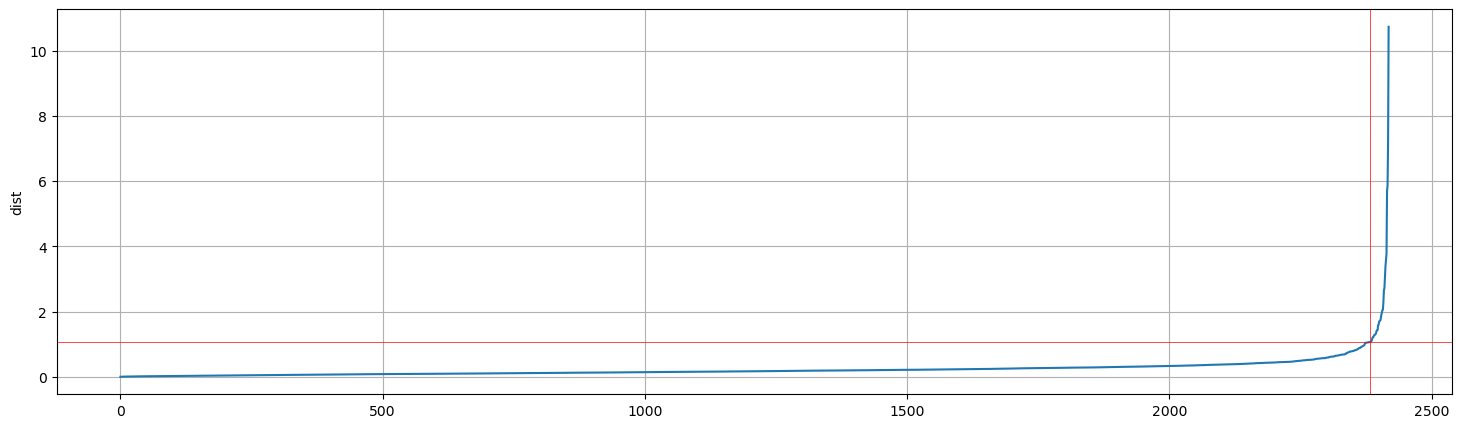

2024-12-09 11:21:12,036 - 561336225.py - root - do_dist_flattening - INFO - {'num_nodes': 2457, 'height': 9, 'num_root_children': 2, 'num_leaves': 2420, 'branching': 68.17, 'avg_degree': 1.0, 'avg_balance': 0.02, 'dia': 17, 'avg_depth': 4.98, 'width': 749}


{'num_nodes': 2457, 'height': 9, 'num_root_children': 2, 'num_leaves': 2420, 'branching': 68.17, 'avg_degree': 1.0, 'avg_balance': 0.02, 'dia': 17, 'avg_depth': 4.98, 'width': 749}


In [102]:
# DIST --> DDIST
tree=linkage_to_btree(linkage_matrix, chunks_df)
print(get_tree_info_dict(tree))

threshold_dist, index = get_dist_kneepoint(tree,  include_leaves=False, plot=True)
#threshold_dist, index = get_dist_std(tree, std_factor=1.0, include_leaves=False, plot=True)

tree=do_dist_flattening(tree, threshold_dist=threshold_dist)
print(get_tree_info_dict(tree))

2024-12-09 11:22:00,110 - taxomizing_utils.py - root - get_ddist_kneepoint - INFO - knee_ddist: 0.9319, knee_index: 24/ 36


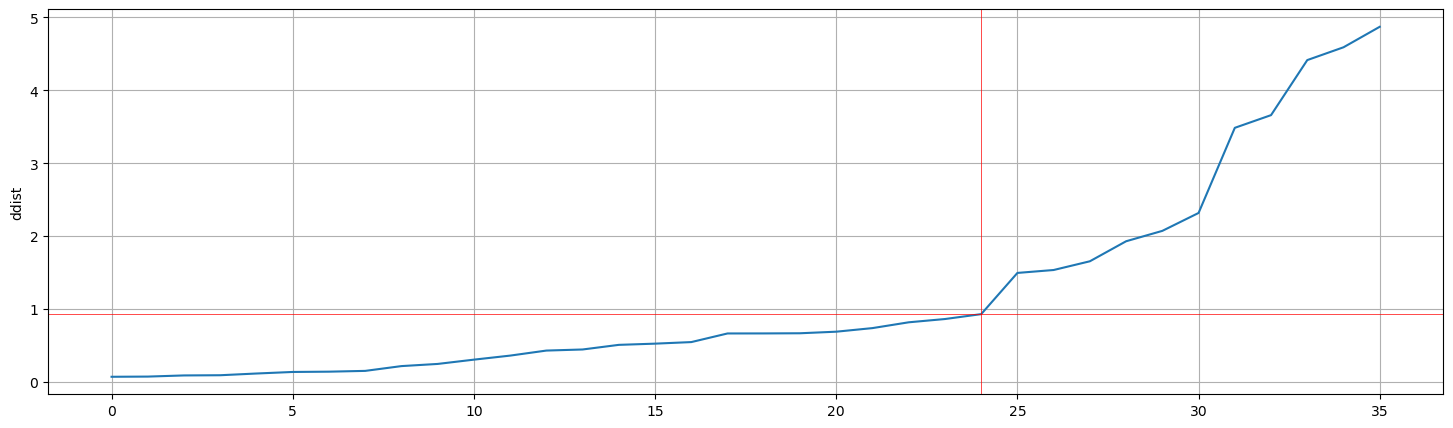

2024-12-09 11:22:00,342 - taxomizing_utils.py - root - do_ddist_flattening - INFO - {'num_nodes': 2441, 'height': 6, 'num_root_children': 2, 'num_leaves': 2420, 'branching': 121.9, 'avg_degree': 1.0, 'avg_balance': 0.01, 'dia': 11, 'avg_depth': 3.92, 'width': 979}


{'num_nodes': 2441, 'height': 6, 'num_root_children': 2, 'num_leaves': 2420, 'branching': 121.9, 'avg_degree': 1.0, 'avg_balance': 0.01, 'dia': 11, 'avg_depth': 3.92, 'width': 979}


In [104]:
#DDIST --> DIST
#tree=linkage_to_btree(linkage_matrix, chunks_df)
add_ddist(tree)

threshold_ddist, index = get_ddist_kneepoint(tree, include_leaves=False, plot=True)
#threshold_ddist, index = get_ddist_std(tree, std_factor=1.0, include_leaves=False, plot=True)

tree=do_ddist_flattening(tree, threshold_ddist=threshold_ddist)
print(get_tree_info_dict(tree))

2024-12-02 14:09:11,807 - taxomizing_utils.py - root - get_dist_kneepoint - INFO - knee_dist: 1.0695, knee_index: 2382/ 2419


{'num_nodes': 4839, 'height': 27, 'num_root_children': 2, 'num_leaves': 2420, 'num_per_height': [1, 1, 1, 1, 1, 1, 1, 1, 2, 2]}


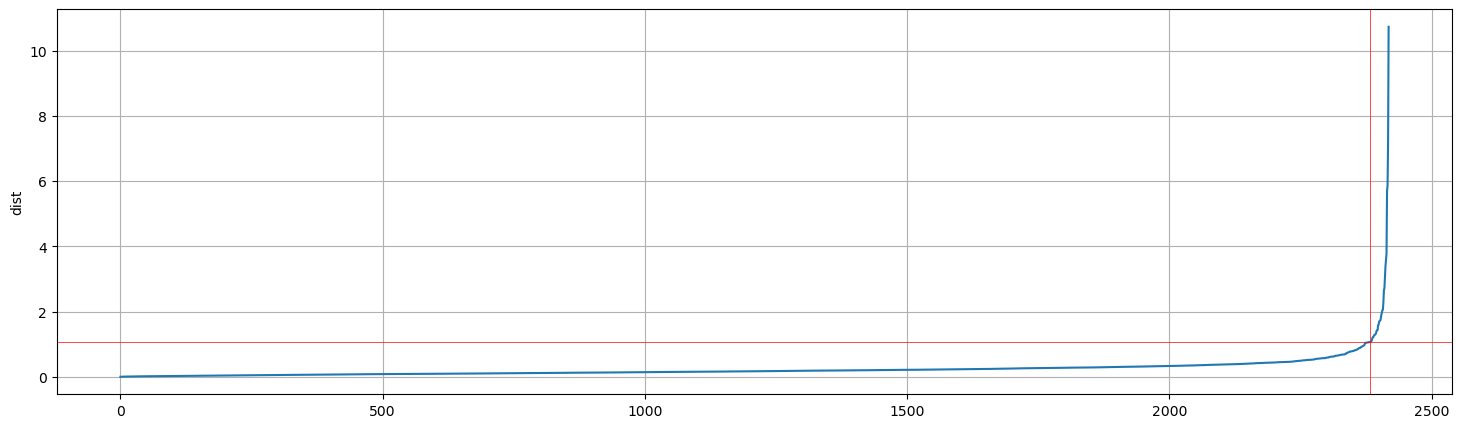

2024-12-02 14:09:12,507 - taxomizing_utils.py - root - get_ddist_kneepoint - INFO - knee_ddist: 0.9319, knee_index: 24/ 36


{'num_nodes': 2457, 'height': 9, 'num_root_children': 2, 'num_leaves': 2420, 'num_per_height': [1, 1, 2, 2, 2, 4, 5, 8, 12]}


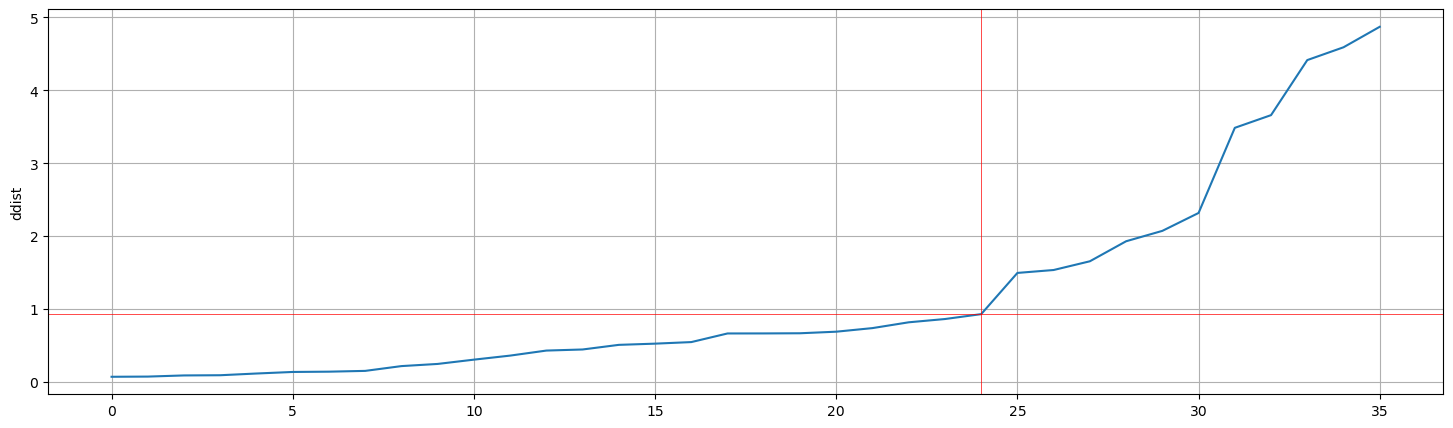

{'num_nodes': 2441, 'height': 6, 'num_root_children': 2, 'num_leaves': 2420, 'num_per_height': [1, 1, 2, 3, 4, 10]}


In [6]:
plot=True
tree=linkage_to_btree(linkage_matrix, chunks_df)
print(get_tree_info_dict(tree))

# vertical flattening
threshold_dist, index = get_dist_kneepoint(tree,  include_leaves=False, plot=plot)
#threshold_dist, index = get_dist_std(tree, std_factor=1.0, include_leaves=False, plot=plot)

tree=do_dist_flattening(tree, threshold_dist=threshold_dist)
print(get_tree_info_dict(tree))

#horizontal flattening
add_ddist(tree)

threshold_ddist, index = get_ddist_kneepoint(tree, include_leaves=False, plot=plot)
#threshold_ddist, index = get_ddist_std(tree, std_factor=1.0, include_leaves=False, plot=plot)
tree=do_ddist_flattening(tree, threshold_ddist=threshold_ddist)
print(get_tree_info_dict(tree))

In [106]:
tree=recover_leaf_parents(tree)
print(get_tree_info_dict(tree))

2024-12-09 11:22:08,575 - taxomizing_utils.py - root - recover_leaf_parents - INFO - {'num_nodes': 2445, 'height': 6, 'num_root_children': 2, 'num_leaves': 2420, 'branching': 101.75, 'avg_degree': 1.0, 'avg_balance': 0.0, 'dia': 11, 'avg_depth': 4.22, 'width': 1519}


{'num_nodes': 2445, 'height': 6, 'num_root_children': 2, 'num_leaves': 2420, 'branching': 101.75, 'avg_degree': 1.0, 'avg_balance': 0.0, 'dia': 11, 'avg_depth': 4.22, 'width': 1519}


In [248]:
taxomizer=TaxomizingPipeline()
taxomizer.get_config()

2024-12-10 14:45:42,865 - __init__.py - beesup_llm - __init__ - INFO - 0001_TAXOMIZING_PIPELINE initialised


{'type': 'taxomizing_pipeline',
 'id': 1,
 'name': '0001_taxomizing_pipeline',
 'dir_name': 'taxomizing_pipelines',
 'lab_name': 'injection_lab',
 'rel_path': 'injection_lab/taxomizing_pipelines/0001_taxomizing_pipeline',
 'flattening_config': {},
 'linkage_args': {'method': 'ward', 'optimal_ordering': False},
 'timestamp_init': '2024-12-10_15-45-42'}

In [249]:
tree=taxomizer.get_flattened_tree(chunks_df=chunks_df)

2024-12-10 14:45:47,679 - taxomizing_utils.py - root - linkage_to_btree - INFO - {'num_nodes': 3885, 'height': 27, 'num_root_children': 2, 'num_leaves': 1943, 'branching': 2.0, 'avg_degree': 1.0, 'avg_balance': 0.61, 'dia': 46, 'avg_depth': 12.27, 'width': 524}
2024-12-10 14:45:47,689 - taxomizing_utils.py - root - get_dist_kneepoint - INFO - knee_dist: 1.0695, knee_index: 1911/ 1942
2024-12-10 14:45:47,893 - taxomizing_utils.py - root - do_dist_flattening - INFO - {'num_nodes': 1974, 'height': 8, 'num_root_children': 2, 'num_leaves': 1943, 'branching': 65.7, 'avg_degree': 1.0, 'avg_balance': 0.01, 'dia': 14, 'avg_depth': 4.57, 'width': 749}
2024-12-10 14:45:47,900 - taxomizing_utils.py - root - get_ddist_kneepoint - INFO - knee_ddist: 1.6568, knee_index: 21/ 30
2024-12-10 14:45:47,990 - taxomizing_utils.py - root - do_ddist_flattening - INFO - {'num_nodes': 1959, 'height': 5, 'num_root_children': 2, 'num_leaves': 1943, 'branching': 130.4, 'avg_degree': 1.0, 'avg_balance': 0.0, 'dia': 

In [250]:
with open("tree.pkl", "wb") as f:
    pickle.dump(tree, f)

In [ ]:
from anytree import RenderTree
for pre, fill, node in RenderTree(tree):
    if node.is_leaf:
        print(f"{pre}[{node.name}] {getattr(node,'dist',0):.2f} {node.label}")
        continue

    #print(f"{pre}({node.name}) {getattr(node,'dist',0):.2f} {node.size-1} descendants/ {len(node.children)} children")

    children_is_leaf=[n.is_leaf for n in node.children]
    num_leaf_children=children_is_leaf.count(True)
    num_node_children=children_is_leaf.count(False)
    
    print(f"{pre}({node.name}) {getattr(node,'dist',0):.2f} {num_leaf_children} leaf_children/ {num_node_children} node_children")

(4838) 10.73 0 leaf_children/ 2 node_children
├── (4836) 5.86 0 leaf_children/ 3 node_children
│   ├── (4817) 1.44 233 leaf_children/ 0 node_children
│   ├── (4832) 3.39 0 leaf_children/ 2 node_children
│   │   ├── (2420) 3.39 88 leaf_children/ 0 node_children
│   │   └── (4830) 2.72 0 leaf_children/ 3 node_children
│   │       ├── (4827) 2.06 0 leaf_children/ 2 node_children
│   │       │   ├── (2421) 2.06 81 leaf_children/ 0 node_children
│   │       │   └── (4813) 1.32 45 leaf_children/ 0 node_children
│   │       ├── (4819) 1.61 49 leaf_children/ 0 node_children
│   │       └── (4822) 1.73 134 leaf_children/ 0 node_children
│   └── (4834) 3.78 0 leaf_children/ 2 node_children
│       ├── (4820) 1.71 196 leaf_children/ 0 node_children
│       └── (4831) 3.09 0 leaf_children/ 2 node_children
│           ├── (4816) 1.43 117 leaf_children/ 0 node_children
│           └── (4818) 1.59 146 leaf_children/ 0 node_children
└── (4837) 7.24 0 leaf_children/ 2 node_children
    ├── (4829) 2.65 

In [32]:
import pickle

In [8]:
with open("tree.pkl", "wb") as f:
    pickle.dump(tree, f)

## Multiway Tree via HDBScan

In [8]:
taxomizer=HDBScanTaxomizingPipeline()
taxomizer.load_clusterer(
    min_cluster_size=2, #5
    min_samples=1, #None
    alpha=1.0, #1.0
    leaf_size=40, #40
    cluster_selection_epsilon=0.1, #0.0
    cluster_selection_method="eom", #eom, leaf
    allow_single_cluster=False, #False
    #metric='precomputed',
    #metric='euclidean',
    #gen_min_span_tree=True,
)

taxomizer.fit_chunks_df(chunks_df)

chunks_df['cid']=taxomizer.clusterer.labels_

nodes_df=taxomizer.nodes_df
member_df=taxomizer.member_df
member_tree=taxomizer.member_tree

print(f"root children: {len(member_tree.children)}")

# dendro_df=taxomizer.clusterer.single_linkage_tree_.to_pandas()
# dendro_df.rename(columns={'distance':'dist'},inplace=True)
# dendro_df['did']=dendro_df.index

2024-11-27 09:53:02,286 - __init__.py - beesup_llm - __init__ - INFO - 0001_TAXOMIZING initialised
2024-11-27 09:53:03,002 - __init__.py - beesup_llm - fit - INFO - number of clusters: 372
2024-11-27 09:53:03,004 - __init__.py - beesup_llm - fit - INFO - number of clustered: 1807
2024-11-27 09:53:03,005 - __init__.py - beesup_llm - fit - INFO - number of unclustered: 613
2024-11-27 09:53:04,635 - __init__.py - beesup_llm - fit_chunks_df - INFO - tree.height: 169
2024-11-27 09:53:05,730 - __init__.py - beesup_llm - fit_chunks_df - INFO - member_tree.size: 2894


root children: 2


In [77]:
from anytree import RenderTree
for pre, fill, node in RenderTree(member_tree):
    if node.is_leaf: continue
    print(f"{pre}{node.name} ... Node with {node.size-1} descdendants/ {len(node.children)} children")

3889 ... Node with 3501 descdendants/ 2 children
├── 3891 ... Node with 6 descdendants/ 6 children
└── 3890 ... Node with 3493 descdendants/ 2 children
    ├── 3893 ... Node with 222 descdendants/ 2 children
    │   ├── 3894 ... Node with 52 descdendants/ 4 children
    │   │   ├── 3898 ... Node with 12 descdendants/ 12 children
    │   │   └── 3899 ... Node with 36 descdendants/ 14 children
    │   │       ├── 3903 ... Node with 9 descdendants/ 9 children
    │   │       └── 3902 ... Node with 13 descdendants/ 2 children
    │   │           ├── 3904 ... Node with 5 descdendants/ 5 children
    │   │           └── 3905 ... Node with 6 descdendants/ 6 children
    │   └── 3895 ... Node with 168 descdendants/ 2 children
    │       ├── 3897 ... Node with 30 descdendants/ 13 children
    │       │   ├── 3901 ... Node with 5 descdendants/ 5 children
    │       │   └── 3900 ... Node with 12 descdendants/ 12 children
    │       └── 3896 ... Node with 136 descdendants/ 16 children
    │    

In [ ]:
plot_emb_clustering_scatter_3d(nodes_df[nodes_df.is_leaf])

In [10]:
linkage_df

,left_child,right_child,dist,size
0,1045.0,1052.0,0.009568,2.0
1,1157.0,1617.0,0.009808,2.0
2,1524.0,1529.0,0.010272,2.0
3,1752.0,1824.0,0.011195,2.0
4,2230.0,2266.0,0.012130,2.0
...,...,...,...,...
2414,4820.0,4831.0,3.780880,459.0
2415,4832.0,4834.0,5.712151,856.0
2416,4817.0,4835.0,5.855102,1089.0
2417,4829.0,4833.0,7.240815,1331.0


In [9]:
dendro_df=taxomizer.clusterer.single_linkage_tree_.to_pandas()
dendro_df.rename(columns={'distance':'dist'},inplace=True)
dendro_df

,parent,left_child,right_child,dist,size
0,2420,1045.0,1052.0,0.009568,2.0
1,2421,1157.0,1617.0,0.009808,2.0
2,2422,1529.0,1524.0,0.010272,2.0
3,2423,1824.0,1752.0,0.011195,2.0
4,2424,2230.0,2266.0,0.012130,2.0
...,...,...,...,...,...
2414,4834,4833.0,1209.0,0.367480,2416.0
2415,4835,4834.0,2194.0,0.370234,2417.0
2416,4836,4835.0,663.0,0.381080,2418.0
2417,4837,4836.0,318.0,0.391034,2419.0


In [ ]:
dendro_df=taxomizer.clusterer.single_linkage_tree_.to_pandas()
dendro_df.rename(columns={'distance':'dist'},inplace=True)

def dendro_df_to_anytree(dendro_df, chunks_df):
    dendro_df.sort_values(by='parent', ascending=False, inplace=True)

    nodes={}
    for _,row in dendro_df.iterrows():
        for child in ['left_child','right_child']:
            node_id=int(row[child])
            if node_id in nodes: continue

            nodes[node_id]=Node(node_id)
            nodes[node_id].__setattr__('dist',row.dist)

            if node_id not in chunks_df.index: continue

            for k,v in chunks_df.loc[node_id].items():
                if k in ['is_leaf','is_root','size','depth','height']: continue
                nodes[node_id].__setattr__(k,v)
            
    for _,row in dendro_df.iterrows():
            parent_id=int(row.parent)
            if parent_id not in nodes:
                 nodes[parent_id]=Node(parent_id)

            for child in ['left_child','right_child']:
                 node_id=int(row[child])
                 nodes[node_id].parent=nodes[parent_id]
               
    for node in nodes.values():
        if node.parent is None:  # Identify root nodes of disconnected components
            break
    
    return node



dendro_tree=dendro_df_to_anytree(dendro_df,chunks_df)
print(get_tree_info_dict(dendro_tree))
dendro_tree

{'num_nodes': 7777, 'num_leaves': 3889, 'mean_num_children': 2.0}


Node('/7776')

7777
i=3777 3777/3777	                         
4000


In [113]:
from anytree import RenderTree
for pre, fill, node in RenderTree(tax_tree):
    if node.is_leaf:
        print(f"{pre}{node.name} {node.label}")
        continue
    
    print(f"{pre}{node.name} ... Node with {node.size-1} descdendants/ {len(node.children)} children")

3889 ... Node with 2930 descdendants/ 2 children
├── 3891 ... Node with 204 descdendants/ 2 children
│   ├── 3892 ... Node with 48 descdendants/ 4 children
│   │   ├── 2272 Cluster with 1 members
│   │   ├── 2474 Cluster with 1 members
│   │   ├── 3896 ... Node with 12 descdendants/ 12 children
│   │   │   ├── 2214 Cluster with 1 members
│   │   │   ├── 2247 Cluster with 1 members
│   │   │   ├── 2265 Cluster with 1 members
│   │   │   ├── 2282 Cluster with 1 members
│   │   │   ├── 2347 Cluster with 1 members
│   │   │   ├── 2373 Cluster with 1 members
│   │   │   ├── 2380 Cluster with 1 members
│   │   │   ├── 2394 Cluster with 1 members
│   │   │   ├── 2467 Cluster with 1 members
│   │   │   ├── 2523 Cluster with 1 members
│   │   │   ├── 2530 Cluster with 1 members
│   │   │   └── 2537 Cluster with 1 members
│   │   └── 3897 ... Node with 32 descdendants/ 32 children
│   │       ├── 1894 Cluster with 1 members
│   │       ├── 1900 Cluster with 1 members
│   │       ├── 1906 Cluster

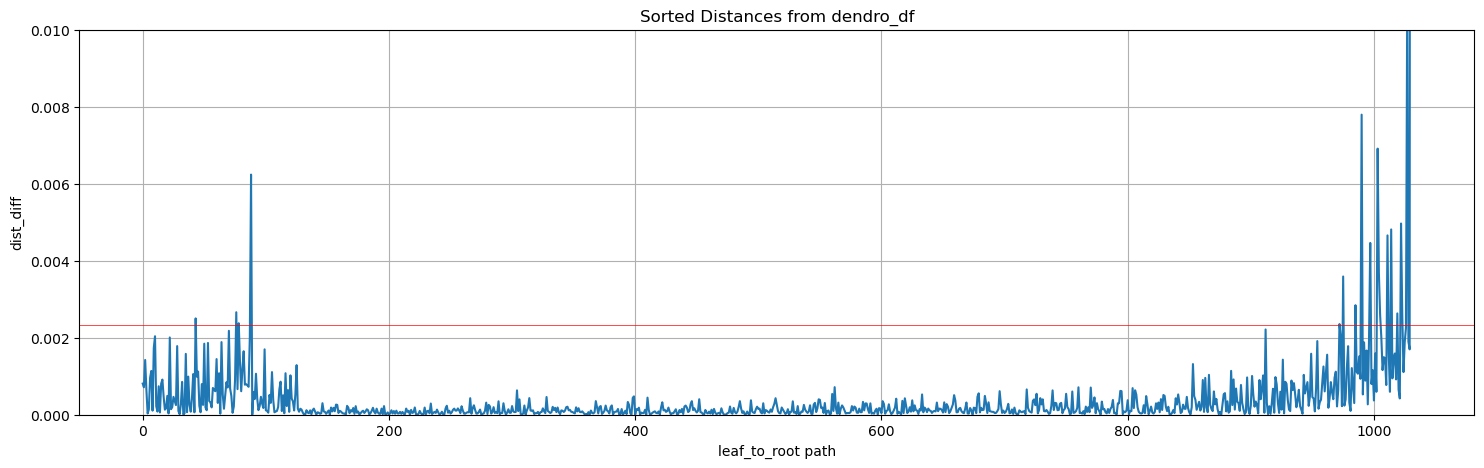

In [ ]:
import matplotlib.pyplot as plt

# Extract the 'dist' column and sort it
sorted_dist = path_df['dist_diff'].dropna()#.sort_values()

# Plot the sorted distances
plt.figure(figsize=(18, 5))
plt.plot(sorted_dist.values)
plt.axhline(y=path_df['dist_diff'].std(), color='red', linestyle='-', linewidth=0.5)
plt.xlabel('leaf_to_root path')
plt.ylabel('dist_diff')
plt.title('Sorted Distances from dendro_df')
plt.ylim(0, 0.01)  # Adjust the y-axis range
plt.grid(True)
plt.show()


In [154]:
data=[]
for cid, size in member_df.cid.value_counts().to_dict().items():

    predicates_str=''
    predicates=[]
    portions=[]
    
    for predicate, p in member_df[member_df.cid==cid]['predicate'].value_counts(normalize=True).to_dict().items():
        predicates_str+=f'{p:.2f}: {predicate}; '
        predicates.append(predicate)
        portions.append(p)

    row=dict(
        cid=cid,
        size=size,
        predicates_str=predicates_str,
        predicates=predicates,
        portions=portions,
    )

    data.append(row)

pd.DataFrame(data)

,cid,size,predicates_str,predicates,portions
0,5.0,127,0.72: Kuckucksbienen; 0.28: Wirtsbienen;,"[Kuckucksbienen, Wirtsbienen]","[0.7165354330708661, 0.28346456692913385]"
1,4.0,126,0.40: Sozialverhalten; 0.32: Familie; 0.28: Vo...,"[Sozialverhalten, Familie, Vorkommen und Leben...","[0.40476190476190477, 0.31746031746031744, 0.2..."
2,0.0,120,0.82: Familie; 0.17: Wissenschaftlicher Name; ...,"[Familie, Wissenschaftlicher Name, Umgangsspra...","[0.825, 0.16666666666666666, 0.008333333333333..."
3,10.0,103,1.00: Nistweise;,[Nistweise],[1.0]
4,3.0,102,0.92: Umgangssprachliche Bezeichnungen; 0.05: ...,"[Umgangssprachliche Bezeichnungen, Merkmale, S...","[0.9215686274509803, 0.049019607843137254, 0.0..."
5,7.0,96,1.00: Pollensammelverhalten;,[Pollensammelverhalten],[1.0]
6,1.0,81,1.00: Umgangssprachliche Bezeichnungen;,[Umgangssprachliche Bezeichnungen],[1.0]
7,2.0,66,0.91: Merkmale; 0.09: Kurzbeschreibung;,"[Merkmale, Kurzbeschreibung]","[0.9090909090909091, 0.09090909090909091]"
8,11.0,62,1.00: Nistweise;,[Nistweise],[1.0]
9,8.0,62,1.00: Pollensammelverhalten;,[Pollensammelverhalten],[1.0]


In [101]:
from anytree import RenderTree
for pre, fill, node in RenderTree(taxomizer.member_tree):
    if node.is_leaf: continue
    print(f"{pre}{node.name} ... Node with {node.size-1} descdendants/ {len(node.children)} children")

3889 ... Node with 3074 descdendants/ 2 children
├── 3891 ... Node with 204 descdendants/ 2 children
│   ├── 3892 ... Node with 48 descdendants/ 4 children
│   │   ├── 3896 ... Node with 12 descdendants/ 12 children
│   │   └── 3897 ... Node with 32 descdendants/ 32 children
│   └── 3893 ... Node with 154 descdendants/ 2 children
│       ├── 3895 ... Node with 28 descdendants/ 28 children
│       └── 3894 ... Node with 124 descdendants/ 58 children
│           ├── 3901 ... Node with 14 descdendants/ 14 children
│           └── 3900 ... Node with 52 descdendants/ 52 children
└── 3890 ... Node with 2868 descdendants/ 2 children
    ├── 3899 ... Node with 21 descdendants/ 21 children
    └── 3898 ... Node with 2845 descdendants/ 2 children
        ├── 3903 ... Node with 349 descdendants/ 2 children
        │   ├── 3905 ... Node with 14 descdendants/ 14 children
        │   └── 3904 ... Node with 333 descdendants/ 2 children
        │       ├── 3907 ... Node with 12 descdendants/ 12 childr

In [108]:
from anytree import Node, RenderTree, PreOrderIter, findall
from anytree.exporter import DotExporter

def reduce_tree_depth(tree, max_depth):
    """
    Reduce the depth of an anytree tree by moving all descendant leaf nodes
    to the node at the specified max_depth and removing deeper branches.

    Args:
        tree (Node): The root of the tree.
        max_depth (int): The depth to cut off branches.

    Returns:
        Node: The modified tree root.
    """
    # Traverse the tree and find all nodes at the max depth
    nodes_at_max_depth = [node for node in PreOrderIter(tree) if (node.depth == max_depth) and (not node.is_leaf)]

    for node in nodes_at_max_depth:
        # Collect all descendant leaves of this node
        descendant_leaves = [leaf for leaf in PreOrderIter(node) if leaf.is_leaf]

        # Reassign all descendant leaves as direct children of this node
        for leaf in descendant_leaves:
            if leaf.parent != node:  # Ensure no self-parenting or redundant reassignment
                leaf.parent = node

        # Remove all previous children (now redundant) from this node
        for child in list(node.children):
            if child not in descendant_leaves:
                child.parent = None

    return tree

tax_tree=copy.deepcopy(taxomizer.member_tree)
tax_tree=reduce_tree_depth(copy.deepcopy(tax_tree), 4)

for node in PreOrderIter(tax_tree):
    if node.is_leaf: continue
    node.__delattr__('emb')

tax_tree=propagate_emb(tax_tree)
tax_tree

Node('/3889', cid=nan, decendant_cids={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}, dist=nan, emb=array([-0.00024735,  0.01230525,  0.03133485, ..., -0.01900094,
        0.00526422,  0.0116678 ], dtype=float32), id=3889, label='Cluster with 3075 members', lambda_val=nan, object=nan, parent_id=nan, predicate=nan, subject=nan)

In [109]:
from anytree import RenderTree
for pre, fill, node in RenderTree(tax_tree):
    if node.is_leaf: continue
    print(f"{pre}{node.name} ... Node with {node.size-1} descdendants/ {len(node.children)} children")

3889 ... Node with 2930 descdendants/ 2 children
├── 3891 ... Node with 204 descdendants/ 2 children
│   ├── 3892 ... Node with 48 descdendants/ 4 children
│   │   ├── 3896 ... Node with 12 descdendants/ 12 children
│   │   └── 3897 ... Node with 32 descdendants/ 32 children
│   └── 3893 ... Node with 154 descdendants/ 2 children
│       ├── 3895 ... Node with 28 descdendants/ 28 children
│       └── 3894 ... Node with 124 descdendants/ 58 children
│           ├── 3901 ... Node with 14 descdendants/ 14 children
│           └── 3900 ... Node with 52 descdendants/ 52 children
└── 3890 ... Node with 2724 descdendants/ 2 children
    ├── 3899 ... Node with 21 descdendants/ 21 children
    └── 3898 ... Node with 2701 descdendants/ 2 children
        ├── 3903 ... Node with 329 descdendants/ 2 children
        │   ├── 3905 ... Node with 14 descdendants/ 14 children
        │   └── 3904 ... Node with 313 descdendants/ 313 children
        └── 3902 ... Node with 2370 descdendants/ 2 children
  

# Generate Headers

- key der am nächsten am mean embedding ist?

In [44]:
reimport()

In [273]:
set_debug()

In [5]:
with open("tree.pkl", "rb") as f: 
    tree = pickle.load(f)
    propagate_emb_from_leaves(tree)

def add_internal_labels(tree):

    for node in PreOrderIter(tree):
        if not node.is_leaf:
            children_is_leaf=[n.is_leaf for n in node.children]
            num_leafs=children_is_leaf.count(True)
            num_node_children=children_is_leaf.count(False)
            node.__setattr__('label',f"internal node ({len(node.children)}/ {len(node.leaves)})")

add_internal_labels(tree)

In [252]:
#GET plot_df

import seaborn as sns
def assign_colors_tree(tree):

    num_internal_nodes=len([node for node in PreOrderIter(tree) if not node.is_leaf])
    colors=sns.color_palette("husl", num_internal_nodes)

    for node in InOrderIter(tree):
        if node.is_leaf: continue

        color=colors.pop()
        node.__setattr__('color',color)

        if all([n.is_leaf for n in node.children]):
            for n in node.children:
                n.__setattr__('color',color)
    return   
assign_colors_tree(tree)

plot_data=[]

for node in PreOrderIter(tree):

    plot_row=dict(
        id=node.name,
        parent_id=node.parent.name if node.parent is not None else None,
        dist=getattr(node,'dist',0),
        label=node.label,
        emb=node.emb,
        parent_emb=node.parent.emb if node.parent is not None else node.emb,
        parent_dist=getattr(node.parent,'dist',node.dist),
        husl_color=node.color,
    )

    plot_data.append(plot_row)

plot_df=pd.DataFrame(plot_data)

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PowerTransformer

emb_matrix=np.vstack(plot_df['emb'].values)
pca=PCA(n_components=2)
pca.fit(emb_matrix)

pca_emb_matrix=pca.transform(emb_matrix)

#dist_scaler = MinMaxScaler(feature_range=(np.min(pca_emb_matrix), np.max(pca_emb_matrix)))
dist_scaler = StandardScaler()


scaler_dist_matrix = dist_scaler.fit_transform(np.vstack(plot_df['dist'].values))
plot_df['pca_coords']=list(np.concatenate([pca_emb_matrix, scaler_dist_matrix], axis=1))


parent_pca_emb_matrix=pca.transform(np.vstack(plot_df['parent_emb'].values))
parent_scaler_dist_matrix=dist_scaler.transform(np.vstack(plot_df['parent_dist'].values))
plot_df['parent_pca_coords']=list(np.concatenate([parent_pca_emb_matrix, parent_scaler_dist_matrix], axis=1))

plot_df.drop(columns=['emb','parent_emb','dist','parent_dist'],inplace=True)
plot_df.head(3)

,id,parent_id,label,husl_color,pca_coords,parent_pca_coords
0,3884,NaN,internal node (2/ 1943),"(0.22126158707091403, 0.6600977737826563, 0.79...","[0.07414571940898895, -0.03606998175382614, 25...","[0.07414571940898895, -0.03606998175382614, 25..."
1,3882,3884.0,internal node (2/ 692),"(0.9614880299080136, 0.3909885385134758, 0.829...","[0.30533868074417114, -0.10439348965883255, 15...","[0.07414571940898895, -0.03606998175382614, 25..."
2,3866,3882.0,internal node (233/ 233),"(0.9648889414626248, 0.41896694790705413, 0.69...","[0.29855072498321533, -0.3859517574310303, 3.7...","[0.30533868074417114, -0.10439348965883255, 15..."


In [ ]:
# PLOT the tree
fig = go.Figure()

pca_coords=np.vstack(plot_df['pca_coords'].values)
parent_pca_coords=np.vstack(plot_df['parent_pca_coords'].values)
parent_traces = np.stack([pca_coords, parent_pca_coords], axis=1)  # Shape: (2445, 2, 3)

# Nodes
node_points=go.Scatter3d(
        x=pca_coords[:,0],
        y=pca_coords[:,1],
        z=pca_coords[:,2],
        mode='markers',  # 'markers' mode for points
        marker=dict(size=2, color=plot_df['husl_color']),  # Customize marker appearance
        name='nodes',  # Name for the legend
        #showlegend=True,
        #text=plot_df['label'].values,
        text=plot_df.apply(lambda x: f"{x.id} {x.label}", axis=1).values,
        hoverinfo='text'
        )
fig.add_trace(node_points)

for i in range(parent_traces.shape[0]):
    parent_trace=go.Scatter3d(
            x=parent_traces[i][:,0],
            y=parent_traces[i][:,1],
            z=parent_traces[i][:,2],
            mode='lines',  # 'markers' mode for points
            line=dict(width=1, color=2*[plot_df['husl_color'][i]]),  # Customize marker appearance
            name='parent_trace',  # Name for the legend
            text=None,
            hoverinfo='none',
            #legendgroup=
            #legendgroup='parent_traces',
            showlegend=False,
            #text=nodes_df['label'].values,
            #hoverinfo='text'
            )

    fig.add_trace(parent_trace)


fig.update_layout(GO_LAYOUT)
fig.show(renderer='vscode')

# fig.update_layout(height=None, width=None, margin=dict(l=0, r=0, t=0, b=0))
# fig.write_html("taxoplot.html", full_html=True)

In [254]:
from sklearn.metrics.pairwise import cosine_similarity

def get_diverse_order(embs, start_idx):
    """
    Optimized version to select vectors iteratively such that each next vector
    has the lowest average similarity to all previously selected vectors.

    Args:
        embeddings (np.ndarray): Array of embedding vectors (shape: [n_samples, n_features]).
        start_idx (int): Index of the starting vector.

    Returns:
        list: Indices of vectors in the order they are selected.
    """
    # Step 1: Compute pairwise cosine similarity matrix once
    similarity_matrix = cosine_similarity(embs)
    n_vectors = len(embs)
    
    # Step 2: Initialize tracking variables
    selected_indices = [start_idx]  # Start with the given vector
    unselected_indices = set(range(n_vectors)) - {start_idx}
    cumulative_similarity = np.zeros(n_vectors)  # Keep track of cumulative similarity for all vectors
    
    # Step 3: Update cumulative similarity for all unselected vectors
    cumulative_similarity += similarity_matrix[start_idx]

    # Step 4: Iteratively select the most dissimilar vector
    while unselected_indices:
        # Compute average similarity only for unselected vectors
        avg_similarity = {idx: cumulative_similarity[idx] / len(selected_indices) for idx in unselected_indices}
        
        # Select the vector with the lowest average similarity
        next_idx = min(avg_similarity, key=avg_similarity.get)
        
        # Update tracking variables
        selected_indices.append(next_idx)
        unselected_indices.remove(next_idx)
        
        # Update cumulative similarity with the newly selected vector
        cumulative_similarity += similarity_matrix[next_idx]
    
    return selected_indices

chunk_embs=np.vstack(chunks_df['emb'].values)
header_embs=np.vstack([n.emb for n in PreOrderIter(tree) if not n.is_leaf])
match_matrix=cosine_similarity(header_embs,chunk_embs)

i=0
for pre, fill, node in RenderTree(tree): #RenderTree traverses in pre-order!
    if node.is_leaf: continue

    chunk_mask = np.zeros(len(chunks_df), dtype=bool)

    include_chunk_mask=np.zeros(len(chunks_df), dtype=bool)
    include_chunk_mask[[n.name for n in node.leaves]]=True

    if node.siblings:
        exclude_chunk_mask = np.zeros(len(chunks_df), dtype=bool)
        exclude_chunk_mask[[n.name for s in node.siblings for n in s.leaves]] = True

    ranking_df=chunks_df.copy()
    ranking_df['score']=match_matrix[i]
    #ranking_df.sort_values(by='score', ascending=False, inplace=True)

    include_chunks_df=ranking_df[include_chunk_mask].copy()
    include_chunks_df.sort_values(by='score', ascending=False, inplace=True)
    #include_chunks_df.reset_index(inplace=True)
    include_chunk_idc=get_diverse_order(np.vstack(include_chunks_df['emb'].values), 0)
    include_chunks_df=include_chunks_df.iloc[include_chunk_idc]
    include_chunks_df[1:]=include_chunks_df[1:][::-1]
    node.__setattr__("include_chunk_idc",list(include_chunks_df.index.values))

    if node.siblings:
        exclude_chunks_df=ranking_df[exclude_chunk_mask].copy()
        exclude_chunks_df.sort_values(by='score', ascending=False, inplace=True)
        #exclude_chunks_df.reset_index(inplace=True)
        exclude_chunk_idc=get_diverse_order(np.vstack(exclude_chunks_df['emb'].values), 0)
        exclude_chunks_df=exclude_chunks_df.iloc[exclude_chunk_idc]
        exclude_chunks_df[1:]=exclude_chunks_df[1:][::-1]
        node.__setattr__("exclude_chunk_idc",list(exclude_chunks_df.index.values))
    else:
        node.__setattr__("exclude_chunk_idc",[])

    i+=1
    print(f"{i}/{header_embs.shape[0]}",end="\r")

    #if i==5: break

In [255]:
with open("tree.pkl", "wb") as f:
    pickle.dump(tree, f)

In [6]:
with open("tree.pkl", "rb") as f: 
    tree = pickle.load(f)

In [7]:
for node in PreOrderIter(tree):
    if node.is_leaf: continue

    include_chunk_idc=set(node.include_chunk_idc)
    exclude_chunk_idc=set(node.exclude_chunk_idc)

    intersection=include_chunk_idc.intersection(exclude_chunk_idc)
    if len(intersection)>0:
        print(f"Node {node.name} has overlapping include and exclude chunks: {intersection}")


In [8]:
def reset_headers(tree):
    for node in PreOrderIter(tree):
        if node.is_leaf: continue
        node.__setattr__('header',"<unknown section header>")
    tree.__setattr__('header', "Gesamtes Wissen über Wildbienen")

def get_table_of_contents_until(the_node, tree, isolate_branch=False):
    table_of_contents=""
    the_ancestors=the_node.ancestors

    for pre, fill, node in RenderTree(tree):
        
        if (node.is_leaf) and (node.name != the_node.name) : continue
        if (node.is_leaf) and (node.name == the_node.name) : break
        if isolate_branch and (node not in the_ancestors): continue
    
        table_of_contents+=f"{pre}{node.header}\n"
        if node.name == the_node.name: break
        
    
    if isolate_branch:
        table_of_contents=table_of_contents.replace('├──','└──')
        table_of_contents=table_of_contents.replace('│',' ')
    
    return table_of_contents


def get_table_of_contents(tree):
    table_of_contents=""
    for pre, fill, node in RenderTree(tree):
        if node.is_leaf: continue
        table_of_contents+=f"{pre} {node.header}\n"
    return table_of_contents

def get_tree_until(the_node, tree):
    new_tree=copy.deepcopy(tree)
    do_detach=False
    for node in PreOrderIter(new_tree):

        if (node.name == the_node.name):
            do_detach=True
            continue

        if do_detach:
            node.parent=None
    
    return new_tree

def get_tree_branch_until(the_node, tree):
    new_tree=copy.deepcopy(tree)
    ancestor_ids=[n.name for n in the_node.ancestors]

    for node in PreOrderIter(new_tree):
        if node.name in ancestor_ids: continue
        if node.name == the_node.name: continue
        node.parent=None

    return new_tree

def get_headerpath_until(the_node, tree):
    ancestor_ids=[n.name for n in the_node.ancestors]
    headerpath=[]
    for node in PreOrderIter(tree):
        if node.name not in ancestor_ids: continue
        #if node.name != the_node.name: continue
        if node.is_leaf: continue
        headerpath.append(node.header)
    
    return headerpath

reset_headers(tree)

node=tree.leaves[34]

toc=get_table_of_contents(get_tree_until(node, tree))
print(toc)

 Gesamtes Wissen über Wildbienen
└──  <unknown section header>
    └──  <unknown section header>



In [9]:
def get_prompt(node, tree, chunks_df):

    prompt=""
    prompt+="""
GIVEN:
- a table of contents unfolded until a certain subsection whose header is unknown
- content explicitly included in the unfolded subsection
- content explicitly excluded from the unfolded subsection

TASK:
- carefully read the given content and understand what content is included and what is excluded
- make up a header for the unknown subsection under which all explicitly included content can be grouped in the table of contents
- mind that you are about to create a table of contents, so be as concise as possible and avoid redundancies in the table of contents
- don't explain your solution, just answer with a  meaningful section header
""".strip()
    
    prompt+="\n\nTABLE OF CONTENTS:\n"
    prompt+=get_table_of_contents(get_tree_until(node, tree))

    chunk_template="{predicate}: {object}"

    prompt+="\n\nINCLUDED CONTENT:\n"
    max_chars=5000
    chars=0
    for i, chunk_row in chunks_df.iloc[node.include_chunk_idc].iterrows():
        line=f"{chunk_template.format(**chunk_row)}\n"
        prompt+=line
        chars+=len(line)
        if chars>max_chars: break

    prompt+="\n\nEXCLUDED CONTENT:\n"
    max_chars=5000
    chars=0
    for i, chunk_row in chunks_df.iloc[node.exclude_chunk_idc].iterrows():
        line=f"{chunk_template.format(**chunk_row)}\n"
        prompt+=line
        chars+=len(line)
        if chars>max_chars: break

    prompt+="\n\nSECTION HEADER:\n"
    
    return prompt

node=tree.children[1].children[1].children[0]
display(node)

prompt=get_prompt(node,tree,chunks_df)
print(prompt)

Node('/3884/3883/3881/3876', color=(0.5310702086647983, 0.6569113639885688, 0.1931838276161326), ddist=2.250465766976456, dist=2.500571032450675, emb=array([ 0.00728293, -0.00893918,  0.01251962, ..., -0.0003939 ,
       -0.01846371, -0.00837091], dtype=float32), exclude_chunk_idc=[1666, 985, 1762, 960, 592, 119, 1799, 984, 598, 1836, 1253, 106, 384, 564, 472, 1607, 1086, 1757, 1830, 1327, 1085, 122, 263, 926, 388, 895, 653, 1336, 374, 1778, 1069, 718, 60, 1868, 700, 396, 1277, 808, 284, 618, 249, 1332, 1763, 647, 1523, 989, 90, 1759, 397, 352, 532, 378, 235, 1470, 357, 1675, 340, 185, 1769, 660, 1363, 604, 215, 404, 273, 813, 639, 457, 1236, 1784, 200, 1701, 1890, 654, 383, 722, 1065, 1755, 344, 209, 1312, 1702, 44, 1238, 1752, 582, 1021, 420, 941, 1031, 952, 853, 1126, 1859, 346, 682, 1563, 291, 610, 1839, 571, 1654, 761, 1210, 509, 940, 452, 364, 337, 706, 848, 139, 617, 727, 1479, 176, 693, 1741, 1717, 1747, 898, 103, 578, 206, 466, 512, 1123, 123, 435, 1827, 1233, 958, 331, 1001, 

GIVEN:
- a table of contents unfolded until a certain subsection whose header is unknown
- content explicitly included in the unfolded subsection
- content explicitly excluded from the unfolded subsection

TASK:
- carefully read the given content and understand what content is included and what is excluded
- make up a header for the unknown subsection under which all explicitly included content can be grouped in the table of contents
- mind that you are about to create a table of contents, so be as concise as possible and avoid redundancies in the table of contents
- don't explain your solution, just answer with a  meaningful section header

TABLE OF CONTENTS:
 Gesamtes Wissen über Wildbienen
├──  <unknown section header>
│   ├──  <unknown section header>
│   └──  <unknown section header>
│       ├──  <unknown section header>
│       ├──  <unknown section header>
│       └──  <unknown section header>
└──  <unknown section header>
    ├──  <unknown section header>
    │   ├──  <unknown 

In [10]:
#Load Model
llm_pipe=LlamaPipeline()
model=llm_pipe.get_model()

2024-12-10 14:58:54,642 - __init__.py - beesup_llm - __init__ - INFO - 0001_LLM_PIPELINE initialised
2024-12-10 14:58:54,644 - __init__.py - beesup_llm - load_model - INFO - Loading model meta-llama/Meta-Llama-3.1-8B-Instruct
2024-12-10 14:58:55,578 - modeling.py - accelerate.utils.modeling - get_balanced_memory - INFO - We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [57]:
#Load Model
llm_pipe=LlamaPipeline(model=model)
llm_pipe.prepare_inference()

2024-12-10 15:17:27,944 - __init__.py - beesup_llm - __init__ - INFO - 0001_LLM_PIPELINE initialised


In [61]:
reset_headers(tree)
prompts=[]
for pre, fill, node in RenderTree(tree):
    if node.is_leaf: continue
    if node.is_root:
        print(f"{pre} {node.header}")
        continue

    prompt=get_prompt(node,tree,chunks_df)
    header=llm_pipe(prompt,use_chatformat=True, stop_strings=['\n'])[0]['generated_text']

    prompts.append([header,prompt])
    node.__setattr__('header',header)
    print(f"{pre} {header}")


 Gesamtes Wissen über Wildbienen
├──  Wildbienen: Merkmale, Verbreitung, Phänologie, Lebensraum, Aussehen, Nahrung, Parasiten, Requisiten, Synonyme, Gefährdung, Taxonomie, Baumaterial, Bienen im Recht, Wirte, Sozialverhalten, Lebensweise
│   ├──  **Merkmale und Aussehen von Wildbienen**
│   └──  **Wildbienen: Lebensweise und Verbreitung**
│       ├──  **Wildbienen: Lebensweise und Verbreitung**
│       ├──  **Wildbienen: Lebensweise und Verbreitung**
│       └──  **Wildbienen: Lebensweise und Verbreitung**
└──  **Wildbienen: Lebensweise und Verbreitung**
    ├──  **Wildbienen: Lebensweise und Verbreitung**
    │   ├──  **Umgangssprachliche Bezeichnungen und Lebensweise von Wildbienen**


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


    │   └──  **Nist- und Lebensraumbedingungen von Wildbienen**
    └──  **Wildbienen: Lebensweise und Verbreitung**
        ├──  **Wildbienen: Parasiten und Wirte**
        │   ├──  **Wirtsbienen: Beschreibungen und Lebensweise**
        │   └──  **Kuckucksbienen und ihre Wirte**
        └──  **Wildbienen: Parasiten und Wirte**
            ├──  **Wildbienen: Parasiten, Wirte und Lebensraum**
            └──  **Wildbienen: Parasiten, Wirte und Lebensraum**


In [219]:
for pre, fill, node in RenderTree(tree):
    if node.is_leaf: 
        print(f"{pre} [{node.name}] {node.label}")
        continue
    print(f"{pre} ({node.name}) {node.header.upper()}")

 (4838) GESAMTES WISSEN ÜBER WILDBIENEN
├──  (4836) WILDBIENEN UND IHRE PARASITEN
│   ├──  (4817) MERKMALE UND AUSSEHEN VON WILDBIENEN
│   │   ├──  [689] Merkmale/ Die Körperlänge der Königin beträgt 16–18 mm  der Arbeiterin
│   │   ├──  [750] Merkmale/ Die Tiere erreichen eine Körperlänge von 17 bis 19 mm
│   │   ├──  [765] Merkmale/ Die Tiere erreichen eine Körperlänge von 15 bis 18 mm
│   │   ├──  [816] Merkmale/ Die Tiere erreichen eine Körperlänge von 15 bis 17 mm
│   │   ├──  [632] Merkmale/ Die Tiere erreichen eine Körperlänge von 22 bis 26 mm
│   │   ├──  [727] Merkmale/ Die Tiere erreichen eine Körperlänge von 19 bis 22 mm
│   │   ├──  [779] Merkmale/ Die Wiesenhummeln gehören zu den kleineren Hummelarten. Die Arbeiterinnen und
│   │   ├──  [801] Merkmale/ Die Weibchen der Feldhummeln werden 21 bis 24 Millimeter groß
│   │   ├──  [681] Körperbau/ Die Gartenhummel trägt an der Vorder- und Hinterkante des Brustkorbs
│   │   ├──  [705] Merkmale/ Die Heidehummelköniginnen haben ei

In [52]:
with open("tree.pkl", "wb") as f:
    pickle.dump(tree, f)

# Prepare Finetuning

In [158]:
with open("tree.pkl", "rb") as f: 
    tree = pickle.load(f)

In [ ]:
#get injection df

injection_data=[]

last_parent_id=None
for node in PreOrderIter(tree):
    if not node.is_leaf: continue

    if node.parent.name!=last_parent_id:
        headerpath=get_headerpath_until(node, tree)
        toc_until=get_table_of_contents(get_tree_until(node, tree))
        last_parent_id=node.parent.name

    chunk_row=chunks_df.loc[node.name]
    

    injection_row=dict(
        id=node.name,
        parent_id=node.parent.name,
        headerpath=headerpath,
        toc_until=toc_until,
        k_idc=chunk_row['k_idc'],
    )
    
    # num_k_idc=len(chunk_row.k_idc)
    # tree_row=dict(
    #     id=num_k_idc*[node.name],
    #     parent_id=num_k_idc*[node.parent.name],
    #     headerpath=num_k_idc*[headerpath],
    #     toc_until=num_k_idc*[toc_until],
    #     k_idc=chunk_row['k_idc'],
    # )
    injection_data.append(injection_row)

injection_df=pd.DataFrame(injection_data)
injection_df=injection_df.explode('k_idc')

injection_df=injection_df.merge(
    knowledge_df[['s','p','o','source_name','attr_type','n_units','n_words']],
    left_on='k_idc',
    right_index=True,
    )

injection_df.rename(
    columns={
        's':'subject',
        'p':'predicate',
        'o':'object'
        }
        ,inplace=True)

injection_df

,id,parent_id,headerpath,toc_until,k_idc,subject,predicate,object,source_name,attr_type,n_units,n_words
0,689,4817,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n└── Wildbie...,1099,"Bombus humilis (Illiger, 1806)",Merkmale,"Die Körperlänge der Königin beträgt 16–18 mm, ...",wikipedia,Text,1,104
1,750,4817,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n└── Wildbie...,1178,"Bombus muscorum (Linnaeus, 1758)",Merkmale,Die Tiere erreichen eine Körperlänge von 17 bi...,wikipedia,Text,1,169
2,765,4817,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n└── Wildbie...,1198,"Bombus pascuorum (Scopoli, 1763)",Merkmale,Die Tiere erreichen eine Körperlänge von 15 bi...,wikipedia,Text,1,181
3,816,4817,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n└── Wildbie...,1276,"Bombus soroeensis (Fabricius, 1776)",Merkmale,Die Tiere erreichen eine Körperlänge von 15 bi...,wikipedia,Text,1,219
4,632,4817,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n└── Wildbie...,1023,"Bombus alpinus (Linnaeus, 1758)",Merkmale,Die Tiere erreichen eine Körperlänge von 22 bi...,wikipedia,Text,1,113
...,...,...,...,...,...,...,...,...,...,...,...,...
2419,573,4809,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n├── Wildbie...,968,"Anthophora quadrimaculata (Panzer, 1798)",Requisiten,(Steilwände),wildbienen-kataster,Attribute,1,1
2419,573,4809,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n├── Wildbie...,1701,"Halictus quadricinctus (Fabricius, 1776)",Requisiten,(Steilwände),wildbienen-kataster,Attribute,1,1
2419,573,4809,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n├── Wildbie...,2025,"Hylaeus nigritus (Fabricius, 1798)",Requisiten,(Steilwände),wildbienen-kataster,Attribute,1,1
2419,573,4809,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n├── Wildbie...,2257,"Lasioglossum laticeps (Schenck, 1870)",Requisiten,(Steilwände),wildbienen-kataster,Attribute,1,1


In [223]:
injection_df

,id,parent_id,headerpath,toc_until,k_idc,subject,predicate,object,source_name,attr_type,n_units,n_words
0,689,4817,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n└── Wildbie...,1099,"Bombus humilis (Illiger, 1806)",Merkmale,"Die Körperlänge der Königin beträgt 16–18 mm, ...",wikipedia,Text,1,104
1,750,4817,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n└── Wildbie...,1178,"Bombus muscorum (Linnaeus, 1758)",Merkmale,Die Tiere erreichen eine Körperlänge von 17 bi...,wikipedia,Text,1,169
2,765,4817,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n└── Wildbie...,1198,"Bombus pascuorum (Scopoli, 1763)",Merkmale,Die Tiere erreichen eine Körperlänge von 15 bi...,wikipedia,Text,1,181
3,816,4817,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n└── Wildbie...,1276,"Bombus soroeensis (Fabricius, 1776)",Merkmale,Die Tiere erreichen eine Körperlänge von 15 bi...,wikipedia,Text,1,219
4,632,4817,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n└── Wildbie...,1023,"Bombus alpinus (Linnaeus, 1758)",Merkmale,Die Tiere erreichen eine Körperlänge von 22 bi...,wikipedia,Text,1,113
...,...,...,...,...,...,...,...,...,...,...,...,...
2419,573,4809,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n├── Wildbie...,968,"Anthophora quadrimaculata (Panzer, 1798)",Requisiten,(Steilwände),wildbienen-kataster,Attribute,1,1
2419,573,4809,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n├── Wildbie...,1701,"Halictus quadricinctus (Fabricius, 1776)",Requisiten,(Steilwände),wildbienen-kataster,Attribute,1,1
2419,573,4809,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n├── Wildbie...,2025,"Hylaeus nigritus (Fabricius, 1798)",Requisiten,(Steilwände),wildbienen-kataster,Attribute,1,1
2419,573,4809,"[Gesamtes Wissen über Wildbienen, Wildbienen u...",Gesamtes Wissen über Wildbienen\n├── Wildbie...,2257,"Lasioglossum laticeps (Schenck, 1870)",Requisiten,(Steilwände),wildbienen-kataster,Attribute,1,1


In [242]:
injection_row=injection_df.sample(1).iloc[0]
print(injection_row.toc_until)

print("{subject}/ {predicate}\n\n{object}".format(**injection_row))


 Gesamtes Wissen über Wildbienen
├──  Wildbienen und ihre Parasiten
│   ├──  Merkmale und Aussehen von Wildbienen
│   ├──  Wildbienen und ihre Parasiten: Merkmale, Aussehen und Lebensweise
│   │   ├──  Wildbienen und ihre Parasiten: Merkmale, Aussehen und Lebensweise: Parasitische Wildbienen
│   │   └──  Parasitische Wildbienen und ihre Wirte
│   │       ├──  Wildbienen und ihre Parasiten: Merkmale, Aussehen und Lebensweise: Parasitische Wildbienen und ihre Wirte
│   │       │   ├──  Wildbienen und ihre Parasiten: Merkmale, Aussehen und Lebensweise: Parasitische Wildbienen und ihre Wirte
│   │       │   └──  Parasitische Wildbienen und ihre Wirte
│   │       ├──  Wildbienen und ihre Parasiten: Parasitische Wildbienen und ihre Wirte
│   │       └──  Wildbienen und ihre Parasiten: Lebensweise und Ökologie
│   └──  Lebensweise und Ökologie
│       ├──  Lebensweise und Ökologie
│       └──  Wildbienen und ihre Lebensweise
│           ├──  Wildbienen und ihre Parasiten: Parasitische Wildbie

In [231]:
injection_df['parent_id'].value_counts()

parent_id
2423    1172
2422     511
4823     452
4821     335
4809     327
4817     236
4820     196
4818     146
4822     134
4816     117
2420      88
2421      81
4819      49
4813      45
Name: count, dtype: int64

In [225]:
tokenizer=llm_pipe.get_inference_tokenizer()
tokenizer

PreTrainedTokenizerFast(name_or_path='meta-llama/Meta-Llama-3.1-8B-Instruct', vocab_size=128000, model_max_length=131072, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<|begin_of_text|>', 'eos_token': '<|eot_id|>', 'pad_token': '<|begin_of_text|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	128000: AddedToken("<|begin_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128001: AddedToken("<|end_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128002: AddedToken("<|reserved_special_token_0|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128003: AddedToken("<|reserved_special_token_1|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128004: AddedToken("<|finetune_right_pad_id|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128005: Adde

['Die Körperlänge der Königin beträgt 16–18 mm, der Arbeiterin 9–15 mm und des Männchens 12–14 mm. Die Flügelspannweite des Weibchens beträgt 30–32 mm, die der Arbeiterin 20–28 mm und des Männchens 23–27 mm. Ihr Kopf ist lang. \nThorax und Hinterleib können oberseits schwarz, bräunlich oder weißlich gefärbt sein und diese Färbungen kommen vielfach kombiniert vor. Daher ist es kaum möglich, typische Färbungen zu beschreiben. Sogar im selben Nest können verschiedene Farbvarianten nebeneinander auftreten.\nBräunliche Farbvarianten können insbesondere mit der Mooshummel (Bombus muscorum) und der Ackerhummel (Bombus pascuorum) verwechselt werden.\nEine sichere Unterscheidung ist letztlich nur durch mikroskopische Untersuchung präparierter Exemplare möglich.',
 'Die Tiere erreichen eine Körperlänge von 17 bis 19 mm (Königin), 10 bis 16 mm (Arbeiterin) bzw. 13 bis 15 mm (Drohn). Ihre Flügelspannweite beträgt 32 bis 35 mm (Königin), 22 bis 30 mm (Arbeiterin) bzw. 26 bis 29 mm (Drohn). Die Tier

In [ ]:
output=tokenizer(list(injection_df['object'].values), return_length=True)['length']
output

{'input_ids': [[128000, 18674, 735, 9603, 66036, 77241, 2761, 735, 24233, 9321, 82414, 2357, 5289, 220, 845, 4235, 972, 9653, 11, 2761, 1676, 74064, 258, 220, 24, 4235, 868, 9653, 2073, 951, 386, 64068, 331, 729, 220, 717, 4235, 975, 9653, 13, 8574, 3061, 2448, 29952, 1508, 77, 906, 635, 951, 1226, 581, 331, 729, 82414, 2357, 5289, 220, 966, 4235, 843, 9653, 11, 2815, 2761, 1676, 74064, 258, 220, 508, 4235, 1591, 9653, 2073, 951, 386, 64068, 331, 729, 220, 1419, 4235, 1544, 9653, 13, 36883, 59109, 69, 6127, 8859, 13, 720, 98752, 710, 2073, 473, 2295, 273, 581, 20649, 92345, 325, 1220, 5817, 45804, 11, 1437, 2357, 359, 6915, 12666, 68378, 6915, 28784, 2357, 10910, 83, 19910, 2073, 27867, 435, 2357, 10910, 11856, 59165, 3355, 491, 613, 85564, 6729, 531, 14230, 13, 76391, 261, 6127, 1560, 100125, 51937, 11, 3666, 10782, 435, 2357, 10910, 11856, 6529, 42952, 61422, 13, 328, 540, 277, 737, 12069, 8123, 40005, 20649, 96810, 13759, 65, 16349, 268, 81967, 1994, 258, 8363, 8065, 728, 86985, 627

In [ ]:
output

[245,
 356,
 398,
 451,
 241,
 319,
 169,
 300,
 235,
 308,
 51,
 195,
 295,
 136,
 175,
 175,
 168,
 157,
 142,
 116,
 185,
 223,
 14,
 299,
 213,
 234,
 187,
 432,
 189,
 116,
 151,
 164,
 139,
 157,
 180,
 156,
 137,
 58,
 30,
 16,
 110,
 80,
 165,
 190,
 170,
 205,
 121,
 131,
 145,
 182,
 211,
 226,
 208,
 193,
 193,
 178,
 147,
 240,
 221,
 134,
 141,
 106,
 166,
 170,
 170,
 170,
 125,
 155,
 217,
 177,
 308,
 181,
 193,
 183,
 124,
 220,
 107,
 61,
 128,
 199,
 194,
 194,
 150,
 160,
 95,
 114,
 238,
 148,
 408,
 429,
 539,
 387,
 131,
 203,
 147,
 93,
 240,
 390,
 538,
 206,
 43,
 23,
 78,
 106,
 130,
 164,
 144,
 154,
 197,
 217,
 154,
 126,
 829,
 139,
 32,
 31,
 30,
 30,
 30,
 25,
 289,
 183,
 243,
 222,
 166,
 212,
 242,
 257,
 422,
 252,
 409,
 379,
 306,
 330,
 332,
 279,
 279,
 273,
 211,
 258,
 279,
 190,
 195,
 218,
 323,
 266,
 219,
 312,
 282,
 342,
 268,
 219,
 323,
 269,
 328,
 226,
 341,
 350,
 365,
 466,
 244,
 287,
 252,
 283,
 335,
 255,
 276,
 253,
 203,
 348

## Instruction Tuning

In [ ]:
def get_n_words_str(n_words, lang='de'):
    n_words_str=None

    if lang=='de':
        if n_words==1: n_words_str='einem Wort'
        elif n_words==2: n_words_str='zwei Wörtern'
        elif n_words==3: n_words_str='drei Wörtern'
        elif n_words==4: n_words_str='vier Wörtern'
        elif n_words==5: n_words_str='fünf Wörtern'
        elif n_words < 10: n_words_str='weniger als zehn Wörtern'
        elif n_words < 20: n_words_str='weniger als zwanzig Wörtern'
        else:
            n_words_str=f'etwa {round(n_words, -1)} Wörtern'
    
    if lang =='en':
        if n_words==1: n_words_str='one word'
        elif n_words==2: n_words_str='two words'
        elif n_words==3: n_words_str='three words'
        elif n_words==4: n_words_str='four words'
        elif n_words==5: n_words_str='five words'
        elif n_words < 10: n_words_str='less than ten words'
        elif n_words < 20: n_words_str='less than twenty words'
        else:
            n_words_str=f'approximately {round(n_words, -1)} words'
    
    return n_words_str



In [ ]:
def get_system_prompt():
    prompt=""
    prompt+="""
You are a knowledge-oriented AI assistant. \
You provide factual knowledge about the user's input in the style of a lexicon entry, without any additional commentary, conversational language, or speculation. \
You only respond in German, using single words or brief descriptions like in an encyclopedia. \
""".strip()
    

def get_inital_user_prompt(injection_row):
    